<a href="https://colab.research.google.com/github/Alisyed098/Capstone-Project-3---Mobile-Price-Range-Prediction/blob/main/Capstone_Project_3_Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Mobile Price Range Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Syed Junaid Ali


# **Project Summary -**

This project focuses on developing a predictive model to determine the price range of mobile phones based on various features and specifications. This is an Supervised Machine Learning Project.I will have to build a model that can be capable of predicting a Mobile Price Range.During analysis of this dataset i observe that the dataset is a classification problem and my main goal is to predict the Price range of mobiles. In this Notebook i work on the following topics.

First of all i'll do some Exploratory Data Analysis to Analyse the Dataset.

Using following classification models to predict the target:

1). Logistic Regression

2). Decision Tree with cross validation(Grid search CV)

3). Random Forest with cross validation(Grid search CV)

4). xgboost with cross validation(Grid search CV)

5). SVM with cross validation(Grid search CV)

# **GitHub Link -**

https://github.com/Alisyed098/Capstone-Project-3---Mobile-Price-Range-Prediction/blob/main/Capstone_Project_3_Mobile_Price_Range_Prediction.ipynb

# **Problem Statement**


In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price.

In this problem, we do not have to predict the actual price but a price range indicating how high the price is

### Import Libraries

In [4]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [5]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/data_mobile_price_range.csv')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [6]:
# Dataset First Look
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [7]:
df.tail()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[5 rows x 21 columns]

### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
print("Dataset size")
print("Rows {} Columns {}".format(df.shape[0], df.shape[1]))

Dataset size
Rows 2000 Columns 21


So, we are having 2000 rows and 21 columns in our dataset.

### Dataset Information

In [9]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

we found two columns clock_speed and m_dep are  of float data type.

#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

not found any duplicate observation.

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

not having any null/missing value in our dataset.

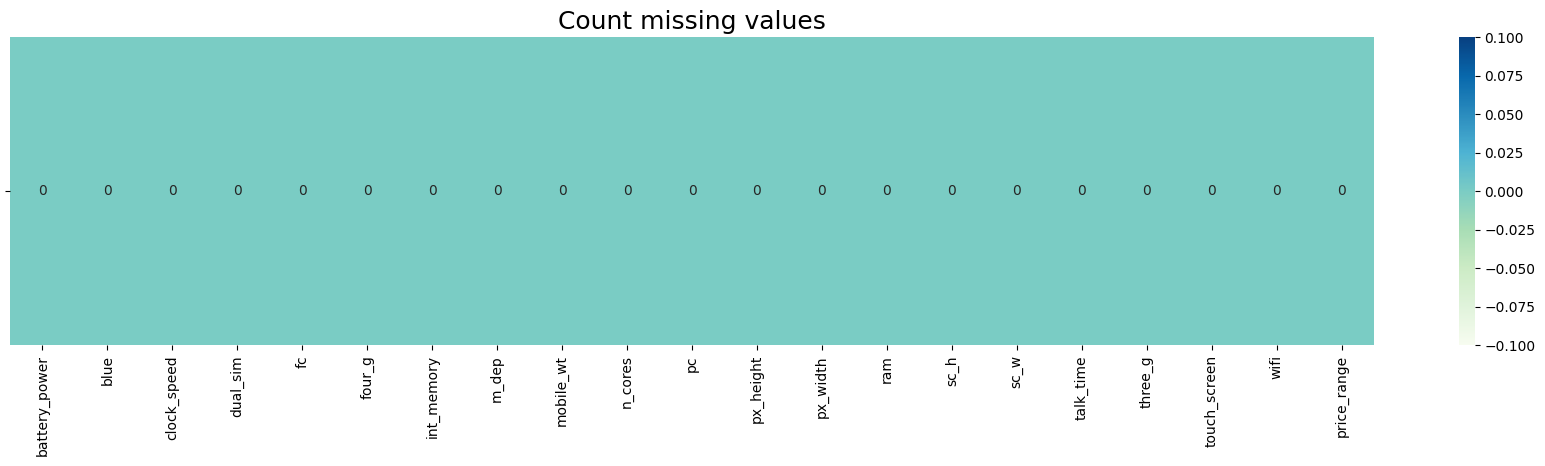

In [12]:
# plotting the null values
plt.figure(figsize=(22,4))
sns.heatmap((df.isna().sum()).to_frame(name='').T,cmap='GnBu', annot=True,
             fmt='0.0f').set_title('Count missing values', fontsize=18)
plt.show()

### Dataset Information

**data_mobile_price_range.csv** - Dataset contains all feature and specification of mobiles.

**Features**

Battery_power - Total capacity a battery can store in one time measured in mAh(numeric)

Blue - Has bluetooth = 1 or not = 0(categorical)

Clock_speed - speed at which microprocessor executes instructions(numeric)

Dual_sim - Has dual sim support = 1 or not = 0(categorical)

Fc - Front Camera mega pixels(categorical)

Four_g - Has 4G = 1 or not = 0(categorical)

Int_memory - Internal Memory in Gigabytes(numeric)

M_dep - Mobile Depth in cm(numeric)

Mobile_wt - Weight of mobile phone(numeric)

N_cores - Number of cores of processor(categorical)

Pc - Primary Camera mega pixels(numeric)

Px_height - Pixel Resolution Height(numeric)

Px_width - Pixel Resolution Width(numeric)

Ram - Random Access Memory in Mega(numeric)

Touch_screen - Has touch screen = 1 or not = 0(categorical)

Wifi - Has wifi = 1 or not = 0(categorical)

Sc_h - Screen Height of mobile in cm(categorical)

Sc_w - Screen Width of mobile in cm(categorical)

Talk_time - longest time that a single battery charge will last when you are(categorical)

Three_g - Has 3G = 1 or not = 0(categorical)

Wifi - Has wifi = 1 or not = 0(categorical)

Price_range(target variable) - This is the target variable with value of 0 = low cost, 1 = medium cost,2 = high cost and 3 = very high cost(categorical)

## ***2. Understanding the Variables***

In [13]:
# Dataset Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [14]:
# Dataset Describe
df.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='Greens')\
                     .bar(subset=["max"], color='#F8766D')\
                     .bar(subset=["mean",], color='#00BFC4')

### Variables Description

As we can see above each feature contains 2000 data records.
There are some numerical features in the dataset including m_dep, px height, and sc_w that their minimum values don't make sense.

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
unique = df.nunique()
unique.to_frame().T

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0           1094     2           26         2  20       2          63     10   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        121        8  ...       1137      1109  1562    15    19         19   

   three_g  touch_screen  wifi  price_range  
0        2             2     2            4  

[1 rows x 21 columns]

In [16]:
# copying the dataset
mob_features_df = df.copy()

In [17]:
# describing the column m_dep
mob_features_df.m_dep.describe()

count    2000.000000
mean        0.501750
std         0.288416
min         0.100000
25%         0.200000
50%         0.500000
75%         0.800000
max         1.000000
Name: m_dep, dtype: float64

- According to the text as well as the google research, I will consider the minimum Mobile Depth to be 0.5 centimeters.

- The minimum range of mobile phone depth varies depending on the manufacturer, model, and specific phone design. However, most smartphones have a thickness (depth) in the range of 7mm to 10mm. Some high-end models may be thinner than this range, with depths as low as 6mm or even less.

- click on the below link for your reference :  
https://www.techrankup.com/en/smartphones-thickness-ranking/



In [18]:
# Finding values below 0.5 cm
below_threshold = mob_features_df.m_dep[mob_features_df.m_dep < 0.5]

# Count the number of values below 0.5 cm
num_below_threshold = len(below_threshold)

# Print the number of values below 0.5 cm
print("Number of values below 0.5 cm in 'm_dep' feature: ", num_below_threshold)

Number of values below 0.5 cm in 'm_dep' feature:  900


so, i found 900 observations which are having thickness below 0.5cm or 5mm. i decided to replace it with 0.5cm.

In [19]:
# Replacing values below 0.5 cm with 0.5 cm
mob_features_df["m_dep"][mob_features_df["m_dep"] < 0.5] = 0.5

In [20]:
# describing the mobile depth column after replacing
mob_features_df.m_dep.describe()

count    2000.000000
mean        0.626000
std         0.165159
min         0.500000
25%         0.500000
50%         0.500000
75%         0.800000
max         1.000000
Name: m_dep, dtype: float64

now, lets check the pixel height(px_height) column

In [21]:
# describing again the column px_height
mob_features_df.px_height.describe()

count    2000.000000
mean      645.108000
std       443.780811
min         0.000000
25%       282.750000
50%       564.000000
75%       947.250000
max      1960.000000
Name: px_height, dtype: float64

I considered the dimensions of the Nokia 1100 (96 x 65 pixels, 3:2 ratio) as the minimum of Pixel Resolution 65 pixels.

click on the below link for your reference :

https://www.gsmarena.com/nokia_1100-512.php


In [22]:
# replacing values with mean where pixel height is 0
mob_features_df['px_height'][mob_features_df[mob_features_df.px_height == 0].index] = mob_features_df.px_height.mean()

In [23]:
# Finding values below 65 pixels
below_threshold1 = mob_features_df.px_height[mob_features_df.px_height < 65]

# Count the number of values below 65 pixels
num_below_threshold1 = len(below_threshold1)

# Print the number of values below 65 pixels
print("Number of values below 65 pixels in 'px_height' feature: ", num_below_threshold1)

Number of values below 65 pixels in 'px_height' feature:  88


so, i found 90 observations which are having pixel height below 65 pixels. i decided to replace it with 65 pixels.

In [24]:
# Replacing values below 65 pixels with 65 pixels
mob_features_df["px_height"][mob_features_df["px_height"] < 65] = 65

In [25]:
# describing the pixel height column after replacing
mob_features_df["px_height"].describe()

count    2000.000000
mean      647.109108
std       441.462495
min        65.000000
25%       284.000000
50%       568.000000
75%       947.250000
max      1960.000000
Name: px_height, dtype: float64

checking screen width(sc_w) column

In [26]:
mob_features_df.sc_w.describe()

count    2000.000000
mean        5.767000
std         4.356398
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        18.000000
Name: sc_w, dtype: float64

as per the reference above the Nokia 1100 screen resolution (96 x 65 pixels, 3:2 ratio), I will consider the minimum Screen Width to be 1 inch = 2.54 centimeters.

In [27]:
# replacing values with mean where screen width is 0
mob_features_df['sc_w'][mob_features_df[mob_features_df.sc_w == 0].index] = mob_features_df.sc_w.mean()

In [28]:
# Find values below 2.54 cm
below_threshold2 = mob_features_df.sc_w[mob_features_df.sc_w < 2.54]

# Count the number of values below 2.54 cm
num_below_threshold2 = len(below_threshold2)

# Print the number of values below 2.54 cm
print("Number of values below 2.54 cm in 'sc_w' feature: ", num_below_threshold2)

Number of values below 2.54 cm in 'sc_w' feature:  366


so, i found 546 observations which are having screen width below 1 inch or 2.54 cm. I decided to replace it with 2.54cm.

In [29]:
# Replacing values below 2.54 cm with 2.54 cm
mob_features_df["sc_w"][mob_features_df["sc_w"] < 2.54] = 2.54

In [30]:
# describing the screen width column after replacing
mob_features_df.sc_w.describe()

count    2000.000000
mean        6.489850
std         3.724604
min         2.540000
25%         3.000000
50%         5.767000
75%         9.000000
max        18.000000
Name: sc_w, dtype: float64

# **Exploratory Data Analysis**

**Categorical and Numeric(Continious) data distribution**

Total number of features except for the target: 20
Number of categorical (<25 Unique Values) features: 13
Number of continuous features: 7


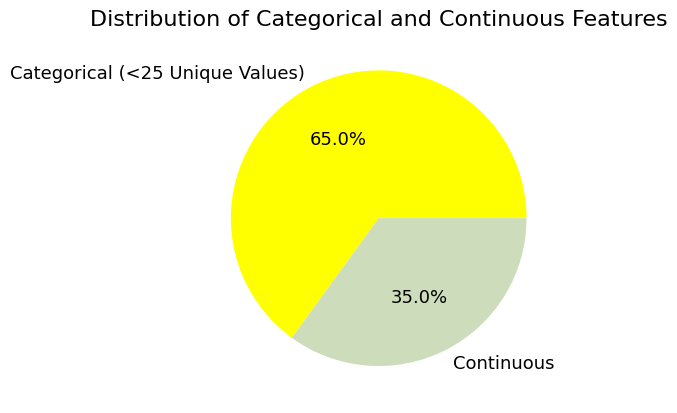

In [31]:
target_variable = 'price_range'
features = [col for col in mob_features_df.columns if col not in ['mob_features_df', target_variable]]

cat_features = [col for col in features if mob_features_df[col].nunique() < 25]
cont_features = [col for col in features if mob_features_df[col].nunique() >= 25]

num_cat_features = len(cat_features)
num_cont_features = len(cont_features)

print(f"Total number of features except for the target: {len(features)}")
print(f"\033[92mNumber of categorical (<25 Unique Values) features: {num_cat_features}")
print(f"\033[96mNumber of continuous features: {num_cont_features}")

# Define labels and colors for the pie chart
labels = ['Categorical (<25 Unique Values)', 'Continuous']
colors = ['#FFFF00', '#cdddbb']

plt.pie([num_cat_features, num_cont_features],
        labels=labels,
        colors=colors,
        textprops={'fontsize': 13},
        autopct='%1.1f%%')

# Add a title to the plot
plt.title('Distribution of Categorical and Continuous Features', fontsize=16)

# Show the plot
plt.show()

**Checking for class imbalance**

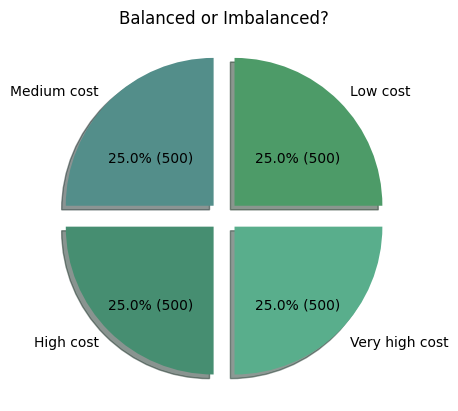

In [32]:
# Count the number of occurrences of each value in the 'price_range' column
value_counts = mob_features_df['price_range'].value_counts()

# Define the label strings using f-strings
label = [f'{"Very high" if i==3 else "High" if i==2 else "Medium" if i==1 else "Low"} cost' for i in range(len(value_counts))]

# Define the colors for each pie slice
colors = ['#4d9b68', '#538e8a', '#468e71', '#59ae8c']

# Create a pie chart with percentage values formatted with a % sign and explode the slices
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(value_counts.values, autopct='%0.1f%%', explode=[0.1, 0.1, 0.1, 0.1], shadow=True, labels=label, colors=colors)

# Add count under percentage
for i, autotext in enumerate(autotexts):
    count = value_counts[i]
    autotext.set_text(f'{autotext.get_text()} ({count})')
    autotext.set_y(autotext.get_position()[1]-0.1)

# Set the title of the pie chart
ax.set_title('Balanced or Imbalanced?')

# Show the pie chart
plt.show()

The above chart shows that all classes of the target variable have the same count. So, the target data is completely balanced.

**Univariate Analysis**

In [33]:
# defining categorical and numeric columns
numerical_columns = list(mob_features_df.loc[:,['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']])
categorical_columns = list(mob_features_df.loc[:,['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi']])

**Exploring Categorical Features**

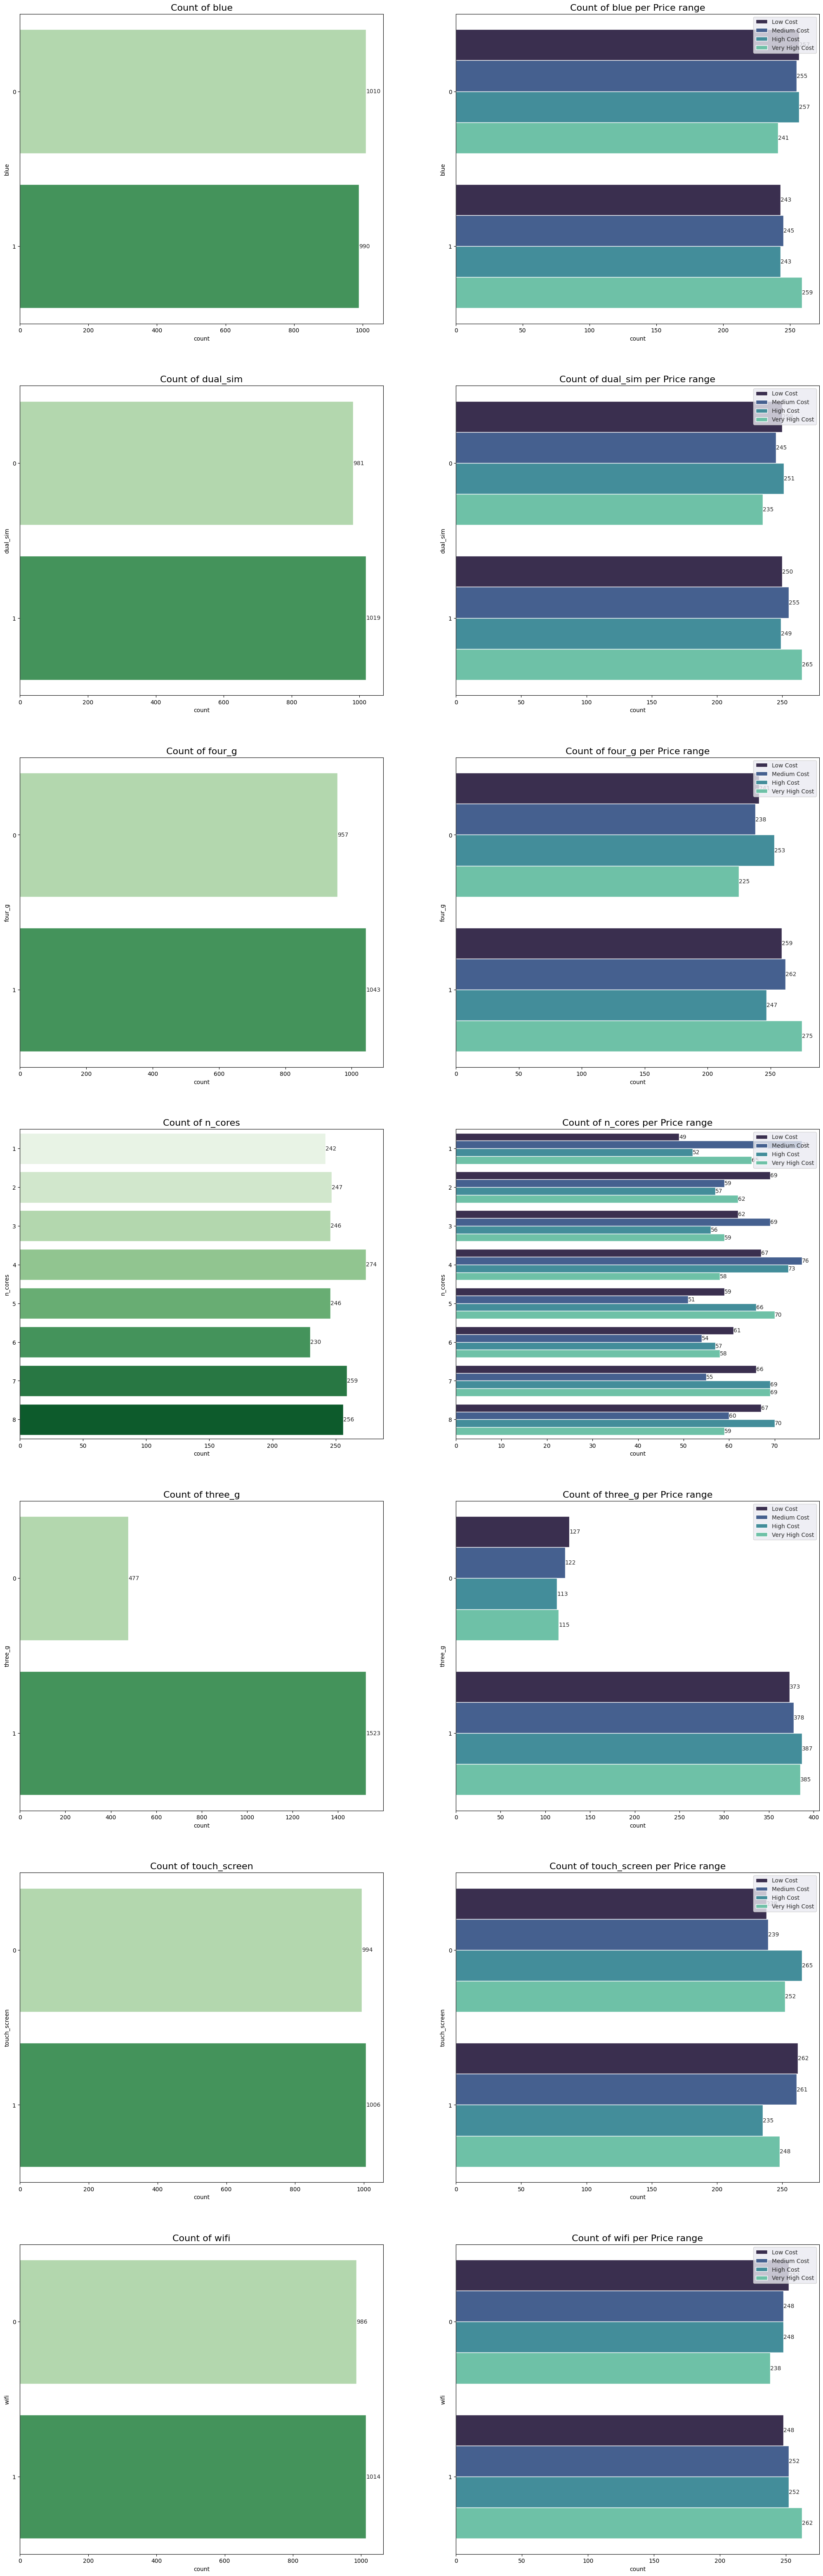

In [34]:
# plotting categorical variables
fig, axes = plt.subplots(7,2, figsize=(25,80))
sns.set_style('darkgrid')
idx = 0
for col in categorical_columns:
    sns.countplot(data=mob_features_df, y=col, palette='Greens', orient='h',
                  ax=axes[idx][0]).set_title(f'Count of {col}', fontsize='16')
    for container in axes[idx][0].containers:
        axes[idx][0].bar_label(container)
    sns.countplot(data=mob_features_df, y=col, palette='mako', orient='h',  hue='price_range',
                  ax=axes[idx][1]).set_title(f'Count of {col} per Price range', fontsize='16')
    for container in axes[idx][1].containers:
        axes[idx][1].bar_label(container)
        axes[idx][1].legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
    idx +=1
plt.show()

**Observations**

- **Bluetooth**:The count of the blue chart shows that mobile phones without Bluetooth have the highest frequency than the ones which are having Bluetooth.
Moreover, the count of blue per price range shows that in the group of mobile phones without Bluetooth, the Low-cost and High-cost phones have the highest frequency, and on the other hand, in the group of mobile phones with Bluetooth, the Very high-cost phones have the highest frequency.

- **Dual Sim**:The count of the dual_sim chart shows that mobile phones which are having Dual Sim have the highest frequency.
Moreover, the count of dual_sim per price range shows that in the group of mobile phones without Dual Sim, the High-cost and Low-cost phones have the highest frequency, and in the group of mobile phones with Dual Sim, the Very high-cost phones have the highest frequency.

- **4G**:The count of the four_g chart shows that mobile phones which are having 4G have the highest frequency than the ones without 4G.
Moreover, the count of four_g per price range shows that in the group of mobile phones with 4G, the Medium-cost phones have the highest frequency.

- **Number of Cores**:The count of the n-cores chart shows that mobile phones containing 4 cores have the highest frequency.
Moreover, the count of n-cores per price range shows that in the group of mobile phones with 4 cores, the Medium-cost phones have the highest frequency, followed by the High_cost phones have the second highest frequency.

- **3G**:The count of the three_g chart shows that mobile phones with 3G have the highest frequency than the ones without 3G.
Moreover, the count of three_g per price range shows that in the group of mobile phones with 3G, the High-cost phones have the highest frequency, and in the group of mobile phones without 3G, the Low-cost phones have the highest frequency.

- **Touch Screen**:The count of the touch_screen chart shows that mobile phones which have Touch Screen have the highest frequency than the ones without Touch Screen.
Moreover, the count of touch_screen per price range shows that in the group of mobile phones with Touch Screen, the Low-cost phones have the highest frequency, and in the group of mobile phones without Touch Screen, the High-cost phones have the highest frequency.

- **Wifi**:The count of the wifi chart shows that mobile phones which are having Wifi have the highest frequency than the ones without Wifi.
Moreover, the count of wifi per price range shows that in the group of mobile phones with Wifi, the Very high-cost phones have the highest frequency, and in the group of mobile phones without Wifi, the Low-cost phones have the highest frequency.

**Exploring Numeric Features**

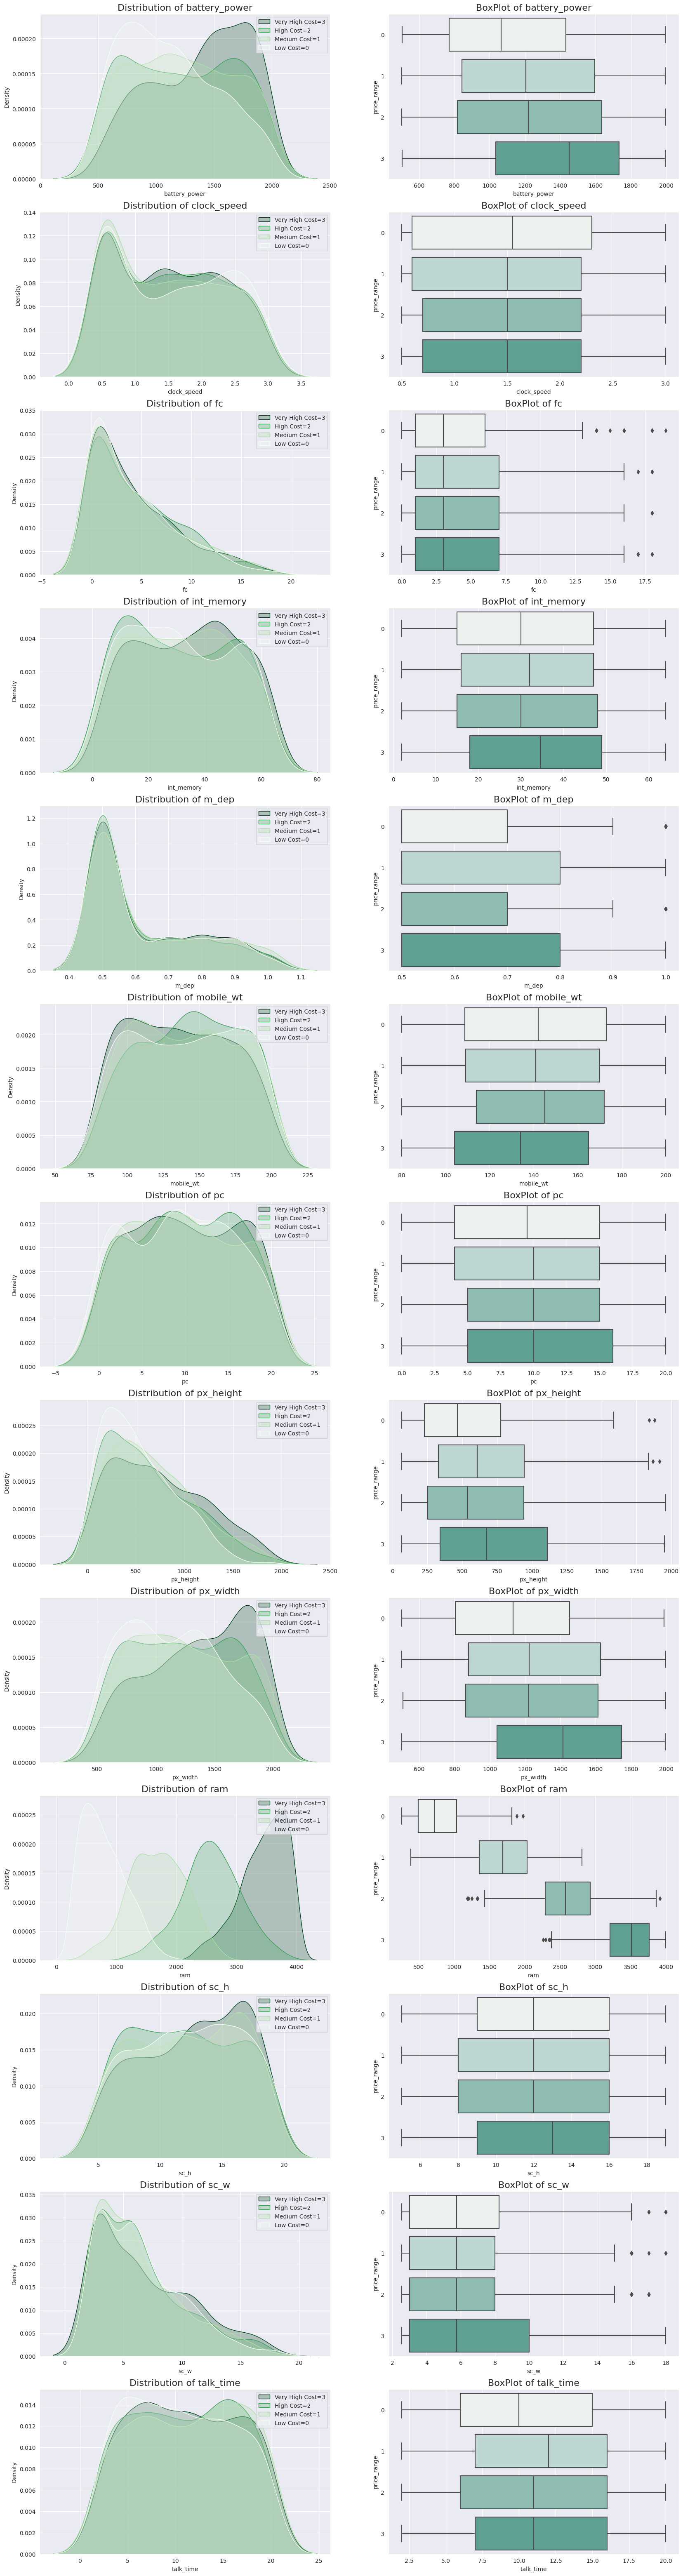

In [35]:
# plotting numeric variables
fig, axes = plt.subplots(13,2, figsize=(20,80))
sns.set_style('darkgrid')
idx = 0
for col in (numerical_columns):
    sns.kdeplot(data=mob_features_df, x=col, palette='Greens',fill=True , hue='price_range',
                ax=axes[idx][0]).set_title(f'Distribution of {col}', fontsize='16')
    sns.boxplot(data=mob_features_df, x=col, palette='light:#5A9' , y='price_range', orient='h',
                ax=axes[idx][1]).set_title(f'BoxPlot of {col}', fontsize='16')
    axes[idx][0].legend(['Very High Cost=3','High Cost=2','Medium Cost=1','Low Cost=0',])

    idx +=1
plt.show()

**Observations**

A normal distribution (with no skewness) is observed in the features of int_memory, mobile_wt, pc and talk time for all price ranges.

- **Battery Power:** Mobile phones with price ranges of 0-3 mostly have battery_power at the range of 600-800, 700-1350, 600-900, and 1500-1900 mAh, respectively.
- **Clock Speed:** Mobile phones with all price ranges mostly have clock_speed at the range of 0.4-0.8.
A positive skewness is observed in the distribution of clock_speed for all price ranges.
The box plot of clock_speed indicates that all price ranges have the same median equal 1.5.
- **Front Camera:**Mobile phones with all price ranges mostly have fc in the range of 0-2.5 megapixels.
A positive skewness is observed in the distribution of fc for all price ranges.
The box plot of fc indicates that all price ranges have the same median equal 3 megapixels.
- **Internal Memory:** Mobile phones with price ranges of 0-3 mostly have int_memory at the range of 10-30, 35-50, 13-20, and 40-50 gigabytes, respectively.
- **Mobile Depth:** A positive skewness is observed in the distribution of m_dep for all price ranges.
Mobile phones with all price ranges mostly have m_dep at the range of 0.5-0.55 cm.
- **Mobile Width:** It looks like normally distributed for all price ranges.
- **Primary Camera:**Mobile phones with all price ranges mostly have pc in the range of 0-10 megapixels. It looks like a normal distribution for all price ranges.
The box plot of pc indicates that all price ranges have the median around 10 megapixels.
- **Pixel Resolution Height:** A positive skewness is observed in the distribution of px_height for all price ranges.
Mobile phones with all price ranges mostly have px_height in the range of 65-500 pixels.

- **Pixel Resolution Width:** Mobile phones with price ranges of 0-3 mostly have px_width in the range of 750-900, 700-1350, 750-1200, and 1500-1700 pixels, respectively.
- **Ram:** Mobile phones with price ranges of 0-3 mostly have ram at the range of 450-750, 1350-1900, 2500-2800, and 3500-3950 megabytes, respectively.
- **Screen Height:** In general, mobile phones with 17 Cm of sc_h have the highest count among all phones.

- **Screen Width:** A positive skewness is observed in the distribution of sc_w for all price ranges.
Mobile phones with all price ranges mostly have sc_w in the range of 2.5-4 cm.
The box plot of sc_w indicates that all price ranges have the same median equal 1.5 cm.
- **Talktime:** The range of talk_time varies from 2 to 20 hrs.
Mobile phones with talk_time 4 hrs with a Low-cost price range have the highest count among all phones.

In [36]:
# describing and grouping all the columns by price range
pr = mob_features_df.groupby(['price_range'])
target = pr.describe(percentiles = [0.25, 0.5, 0.75])[numerical_columns]
target.style.background_gradient(cmap='Greens')

i found that the features with the highest mean value of battery_power, int_memory, pc, px_height, px_width, ram, sc_h and sc_w belong to the Very high-cost mobile phones.

**Mean of 'Price range' per each unique value of different categorical features**

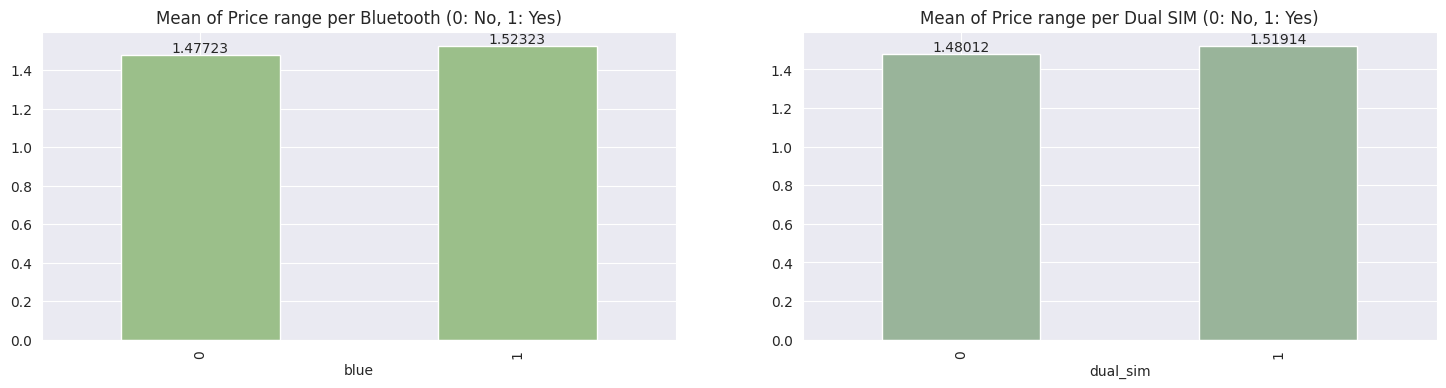

In [37]:
# plotting mean of price range/each unique values
f,ax=plt.subplots(1,2,figsize=(18, 4))

ax1= mob_features_df[['price_range','blue']].groupby(['blue']).mean().plot.bar(color='#9bbf8a',ax=ax[0])
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('Mean of Price range per Bluetooth (0: No, 1: Yes)')
ax1.legend().set_visible(False)

ax2= mob_features_df[['price_range','dual_sim']].groupby(['dual_sim']).mean().plot.bar(color='#99b49a',ax=ax[1])
for container in ax2.containers:
    ax2.bar_label(container)
ax[1].set_title('Mean of Price range per Dual SIM (0: No, 1: Yes)')
ax2.legend().set_visible(False)

plt.show()

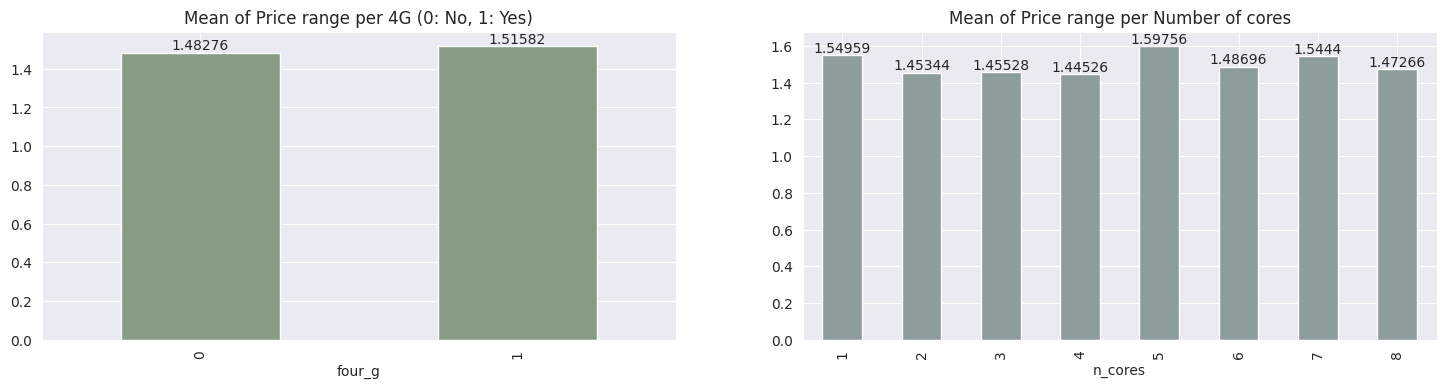

In [38]:
# plotting mean of price range/each unique values
f,ax=plt.subplots(1,2,figsize=(18, 4))

ax1= mob_features_df[['price_range','four_g']].groupby(['four_g']).mean().plot.bar(color='#869d84',ax=ax[0])
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('Mean of Price range per 4G (0: No, 1: Yes)')
ax1.legend().set_visible(False)

ax2= mob_features_df[['price_range','n_cores']].groupby(['n_cores']).mean().plot.bar(color='#8d9d9b',ax=ax[1])
for container in ax2.containers:
    ax2.bar_label(container)
ax[1].set_title('Mean of Price range per Number of cores')
ax2.legend().set_visible(False)

plt.show()

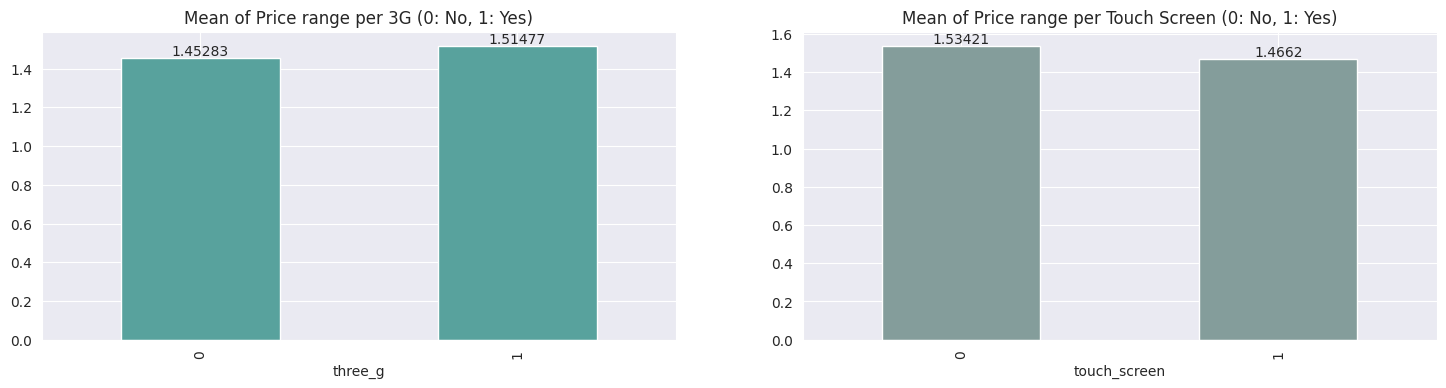

In [39]:
f,ax=plt.subplots(1,2,figsize=(18, 4))

ax1= mob_features_df[['price_range','three_g']].groupby(['three_g']).mean().plot.bar(color='#58a29d',ax=ax[0])
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('Mean of Price range per 3G (0: No, 1: Yes)')
ax1.legend().set_visible(False)

ax2= mob_features_df[['price_range','touch_screen']].groupby(['touch_screen']).mean().plot.bar(color='#849d9b',ax=ax[1])
for container in ax2.containers:
    ax2.bar_label(container)
ax[1].set_title('Mean of Price range per Touch Screen (0: No, 1: Yes)')
ax2.legend().set_visible(False)

plt.show()

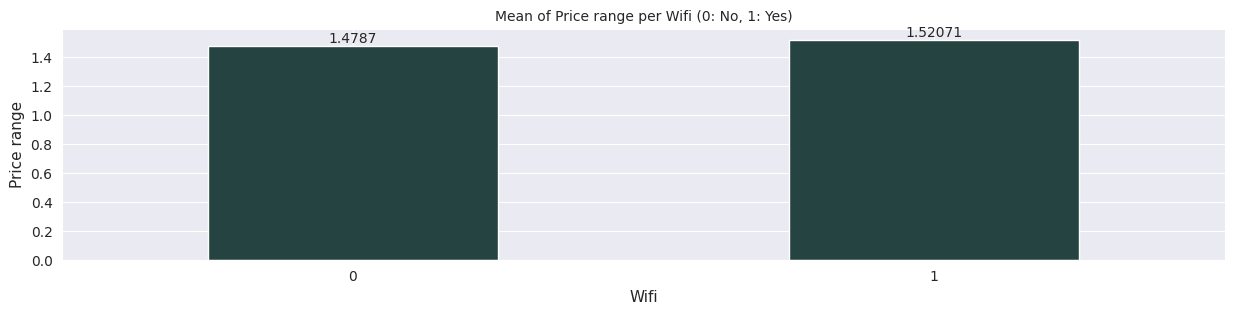

In [40]:
plt.figure(figsize = (15, 3))
a=mob_features_df.groupby('wifi')['price_range'].mean()
ax = a.plot.bar(color="#254441", width=.5)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Mean of Price range per Wifi (0: No, 1: Yes)', size=10)
plt.ylabel('Price range', size=11)
plt.xlabel('Wifi', size=11)
plt.xticks(rotation=0)
plt.legend().set_visible(False)
plt.show()

The Mean of Price range per Number of cores shows that mobile phones with 5 cores have the highest mean of the price range.

**Multivariate Analysis**

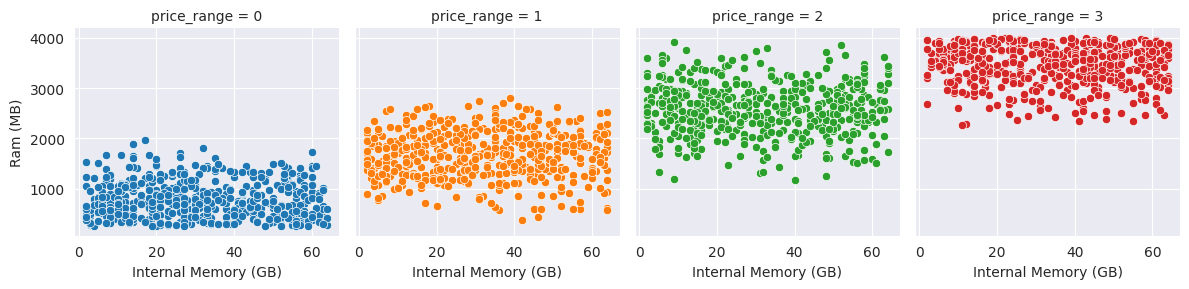

In [41]:
#plotting relationship between Internal memory and Ram
g = sns.FacetGrid(mob_features_df, col="price_range", hue="price_range")
g.map(sns.scatterplot, "int_memory", "ram")
g.set_axis_labels("Internal Memory (GB)", "Ram (MB)")
plt.show()

As per the above graph i found that mobiles having more ram wil increase the cost of mobile.

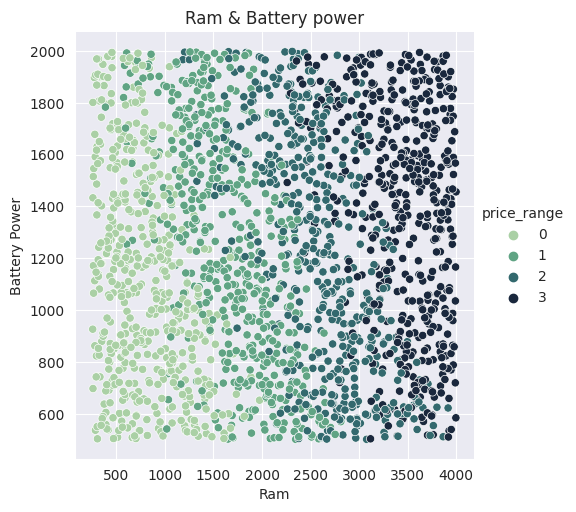

In [42]:
#plotting relationship between Ram & Battery
sns.relplot(data=mob_features_df, x="ram", y="battery_power", hue="price_range", palette="ch:r=-.5,l=.75")
plt.xlabel('Ram')
plt.ylabel('Battery Power')
plt.title('Ram & Battery power')
plt.show()

Battery power does not necessarily improve by increasing the Ram of the mobile phones.

**Display Resolution (Pixel Height x Pixel Width)**

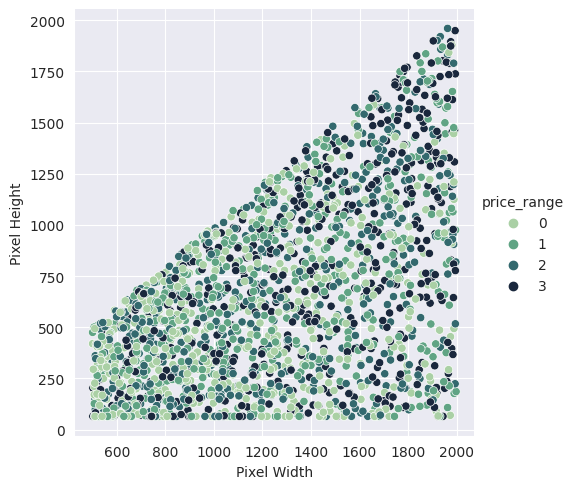

In [43]:
#plotting relationship pixel width & pixel height
sns.relplot(data=mob_features_df, x="px_width", y="px_height", hue="price_range", palette="ch:r=-.5,l=.75")
plt.xlabel('Pixel Width')
plt.ylabel('Pixel Height')
plt.show()

Generally, Display Resolution illustrates by increasing Pixel Height, the Pixel Width will also increase.

**Screen Size (Screen Height x Screen Width)**

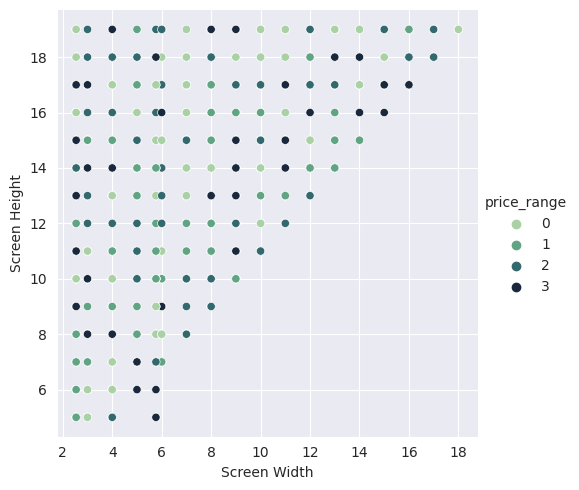

In [44]:
# plotting relationship between Screen Height Screen Width
sns.relplot(data=mob_features_df, x="sc_w", y="sc_h", hue="price_range", palette="ch:r=-.5,l=.75")
plt.xlabel('Screen Width')
plt.ylabel('Screen Height')
plt.show()

**Lets check the relation of categorical features with ram per price range**

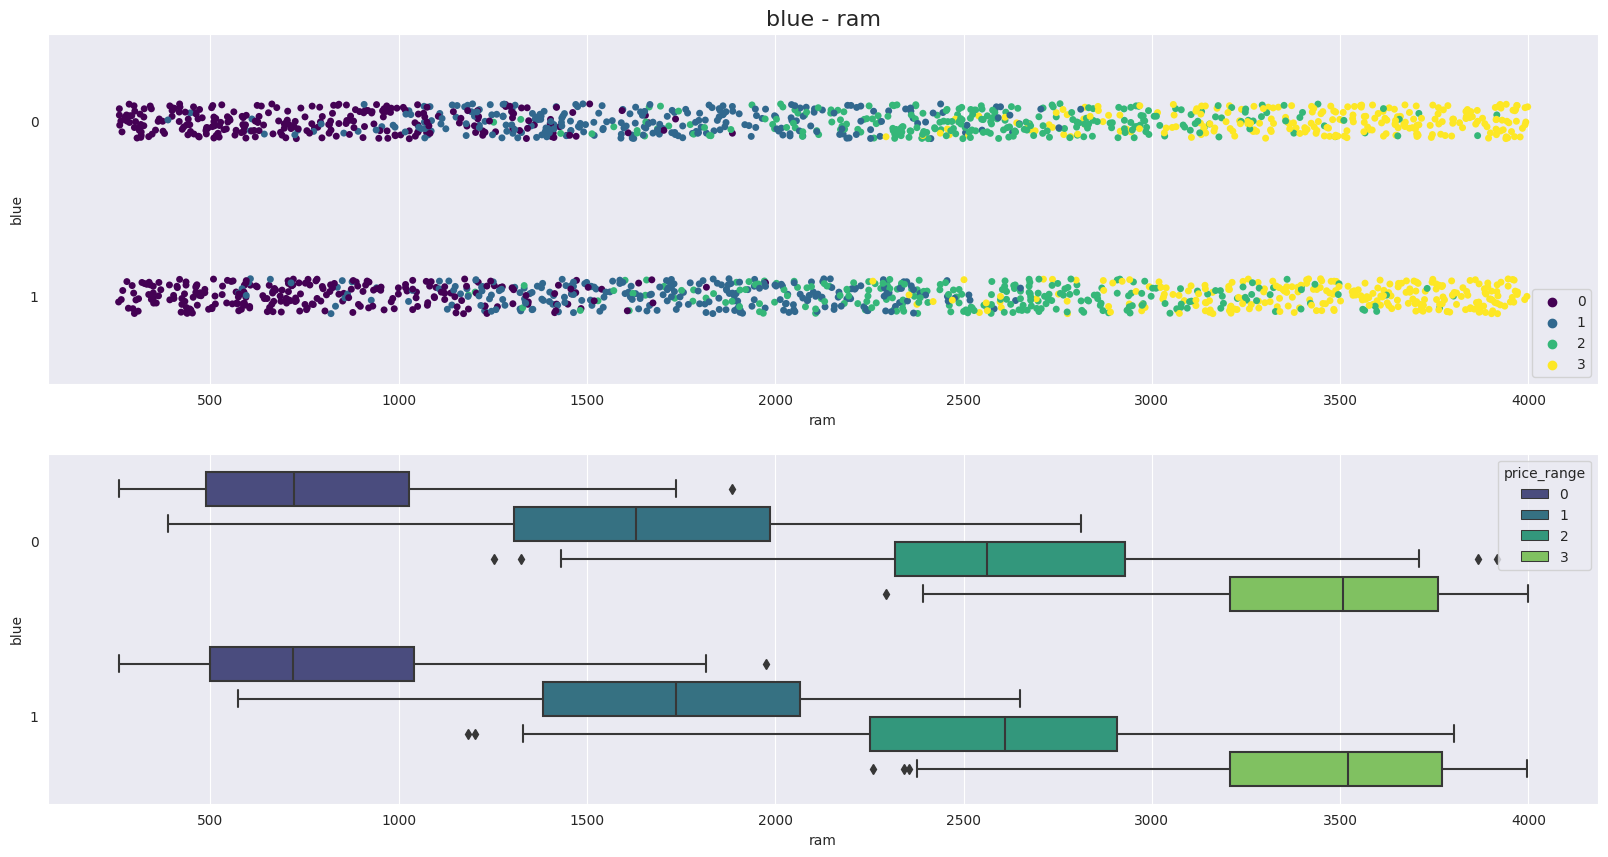

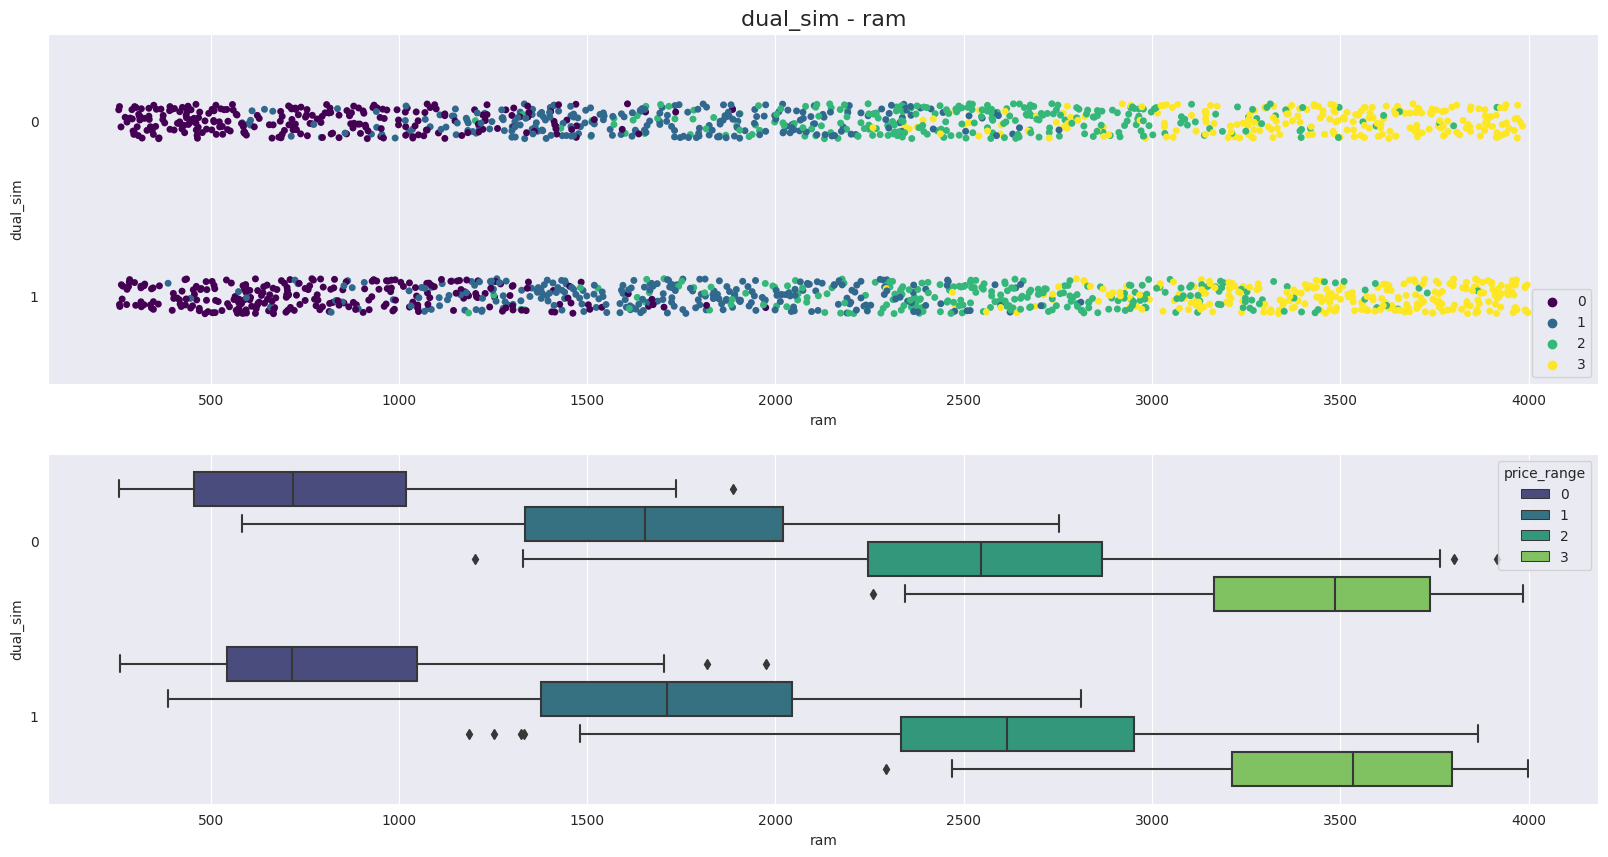

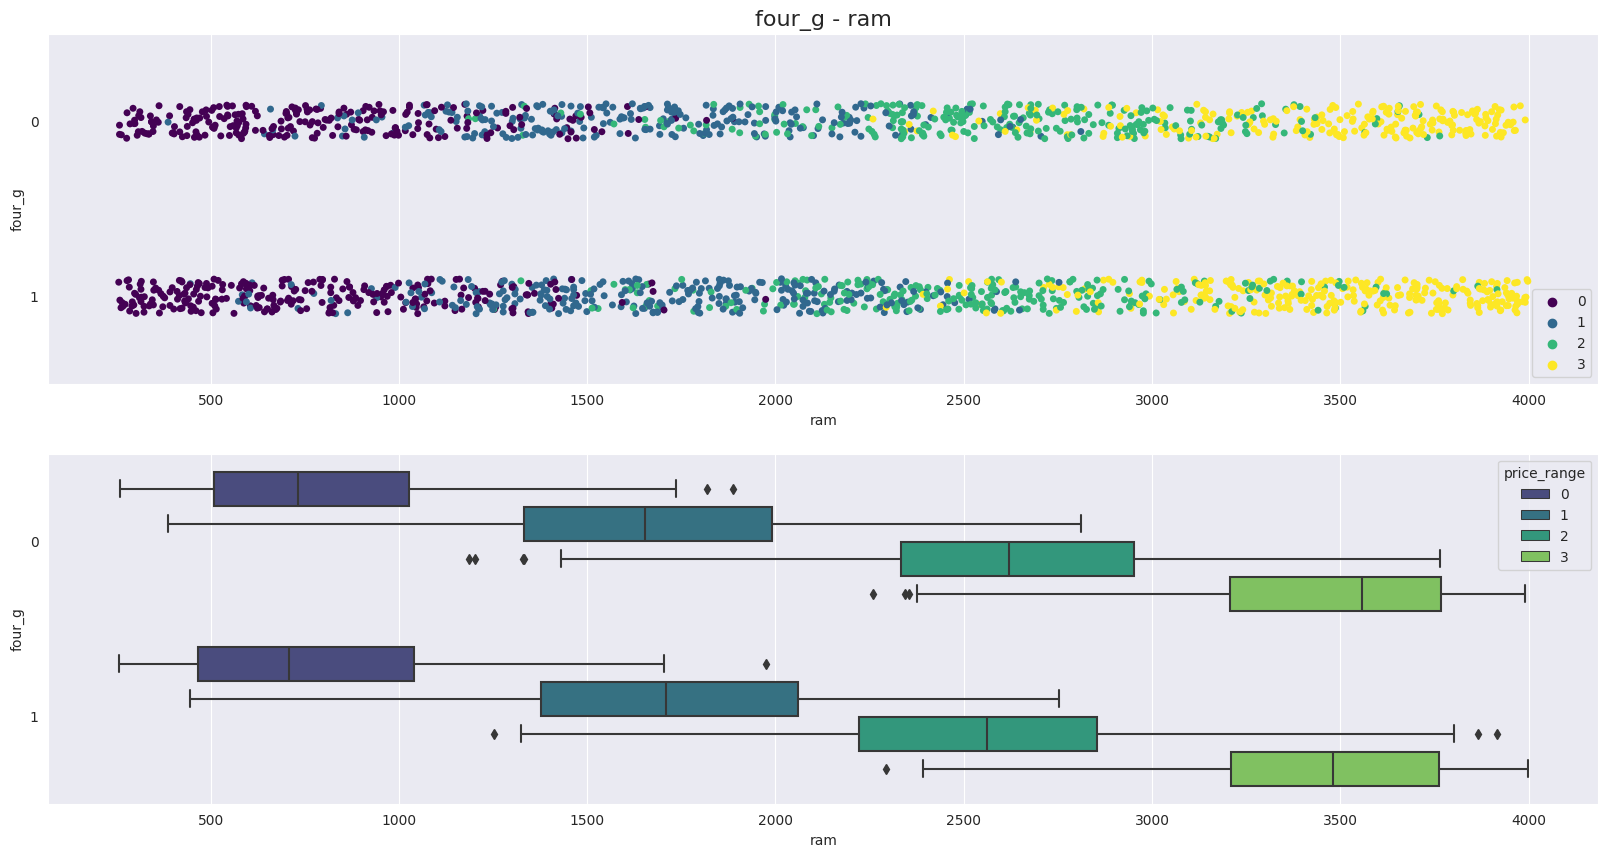

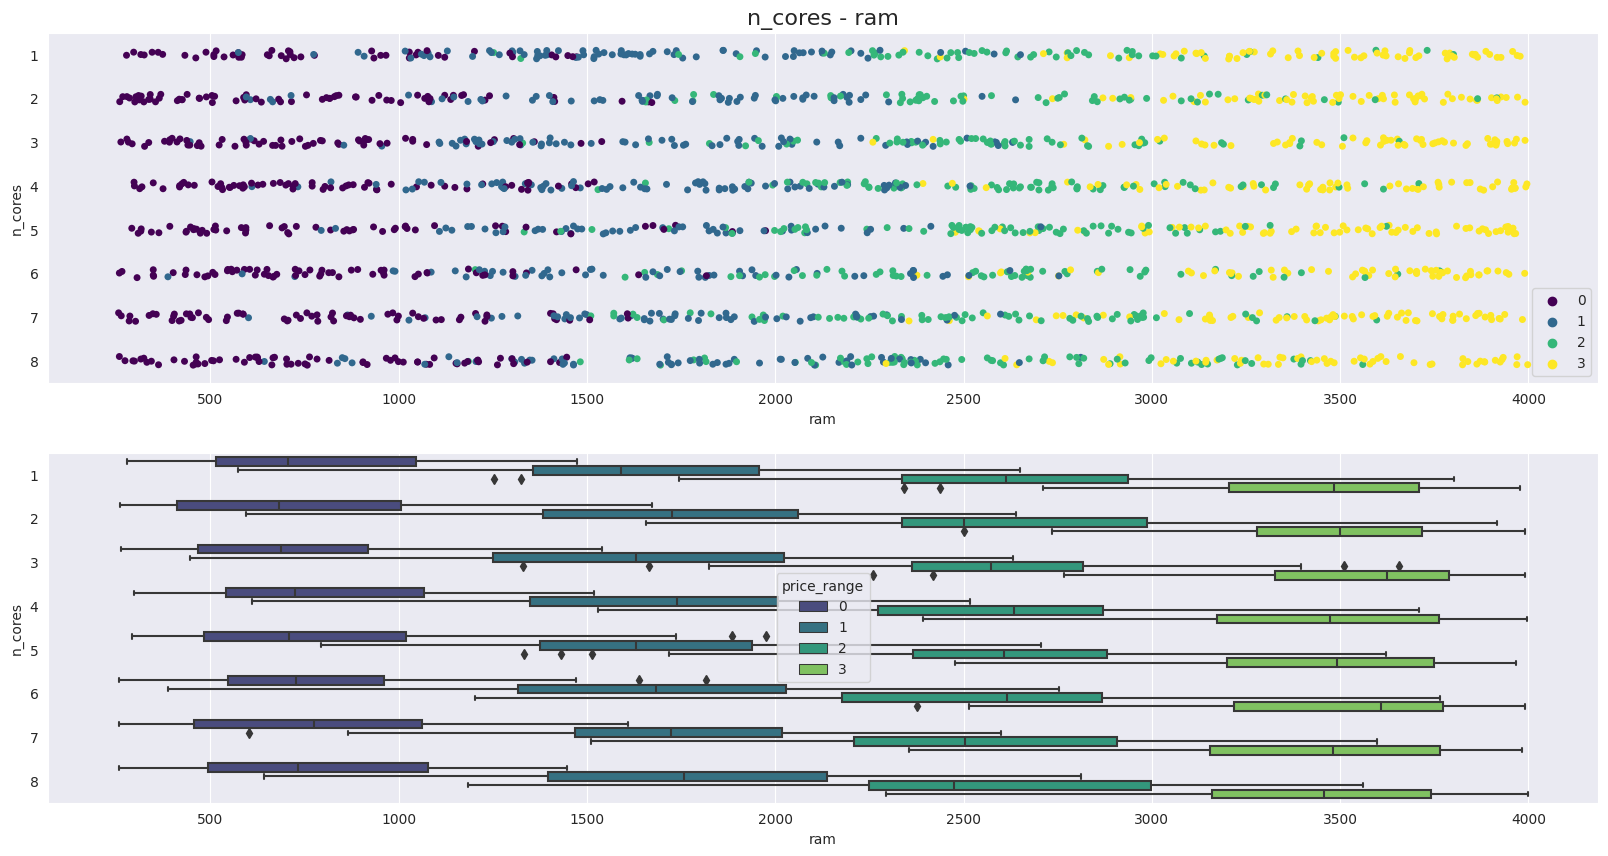

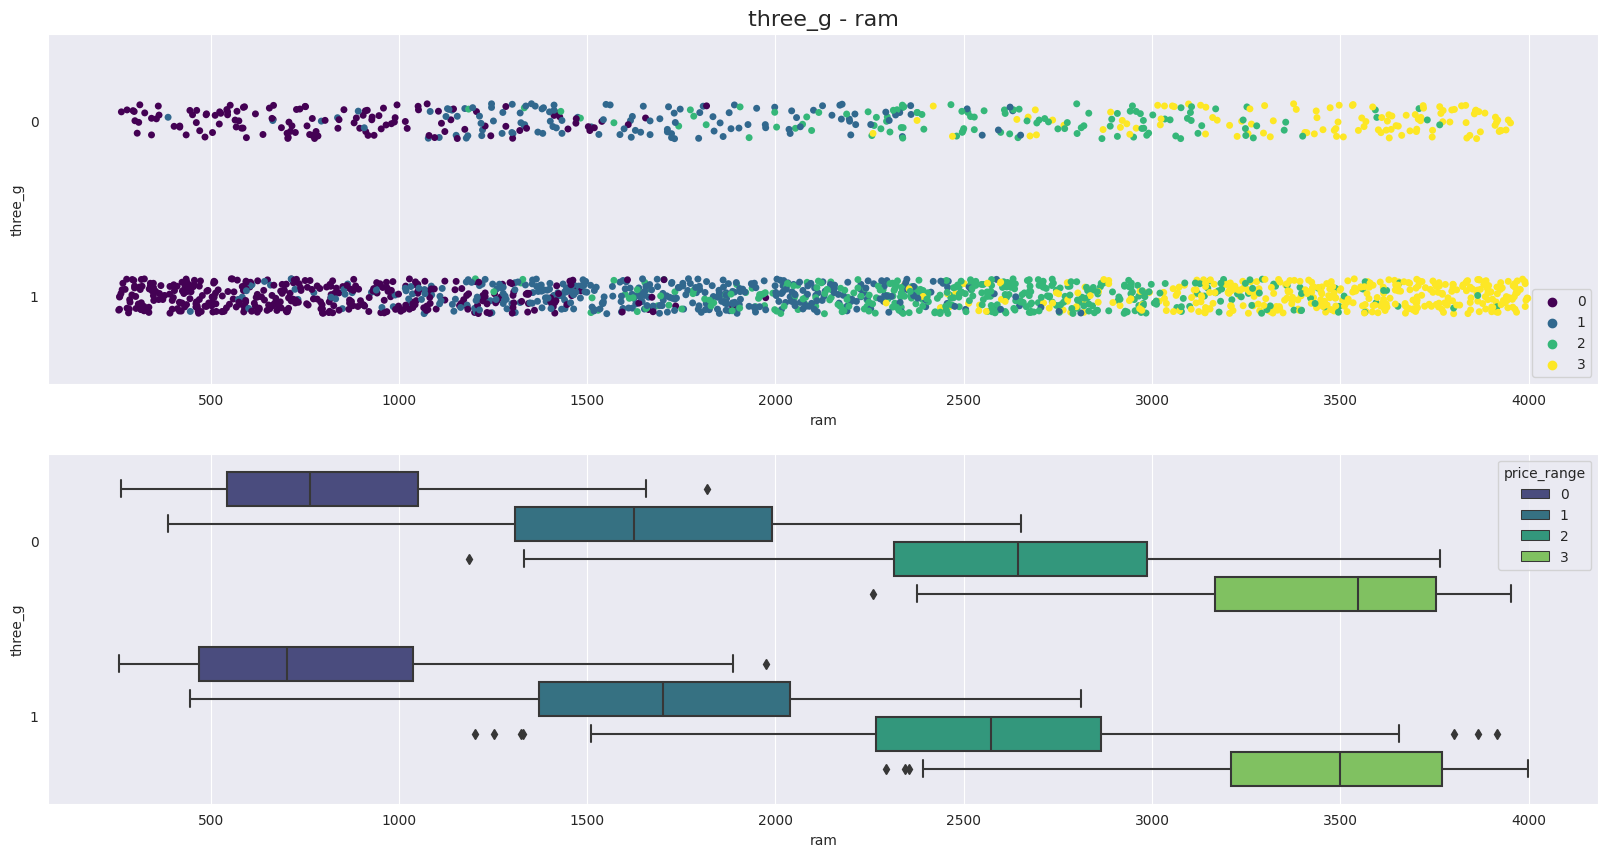

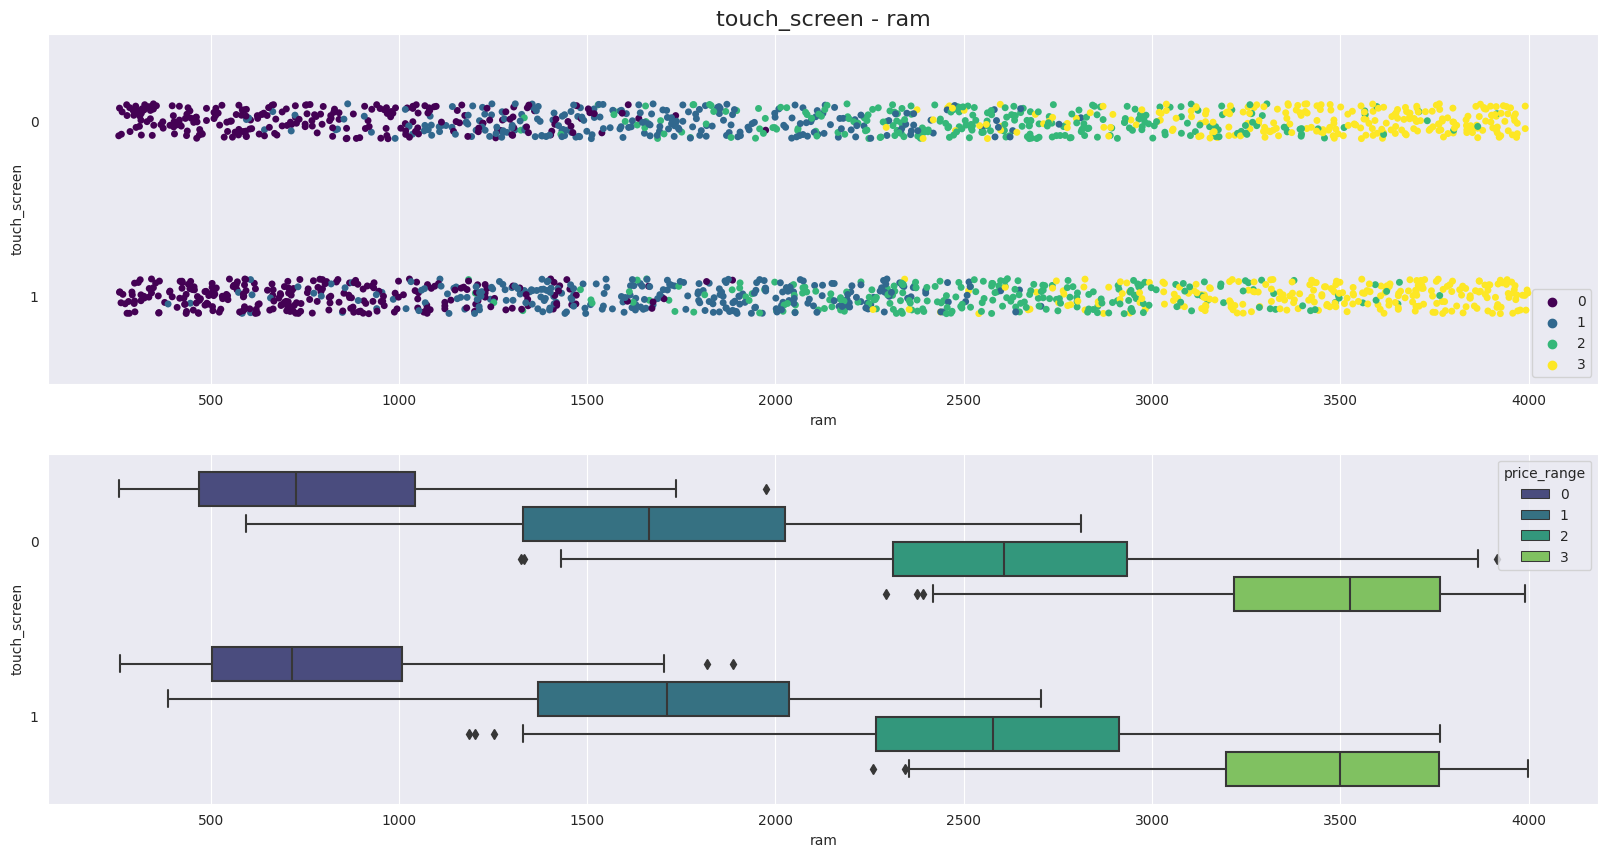

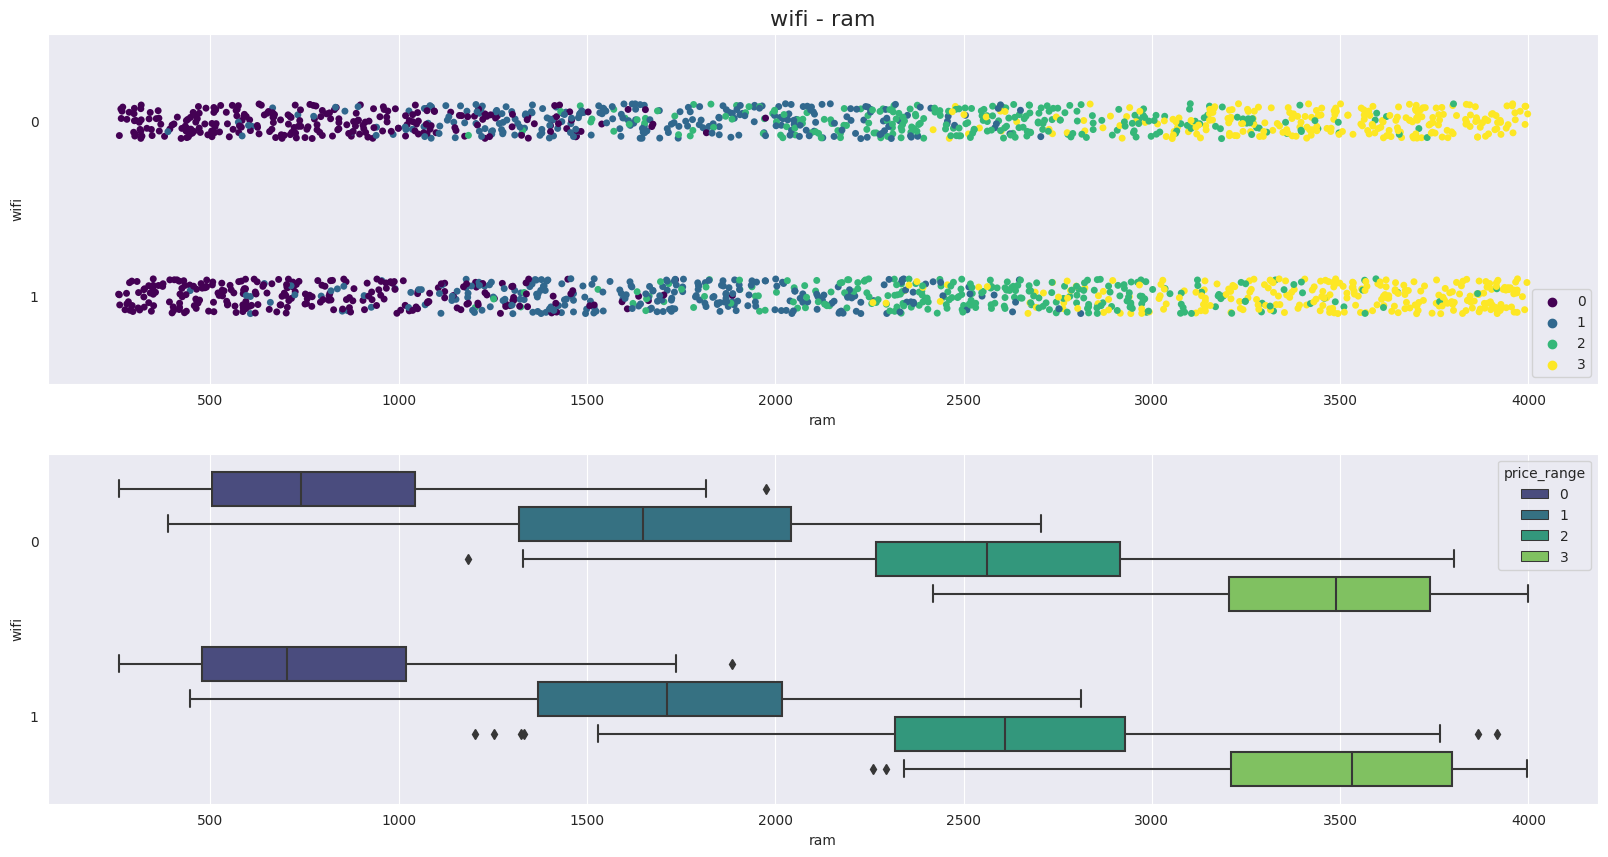

In [45]:
for col in categorical_columns[:]:
  fig, axes = plt.subplots(2,1, figsize=(20,10))
  sns.stripplot(data=mob_features_df, x='ram', palette='viridis', hue='price_range', y=col, orient='h', ax=axes[0])
  axes[0].set_title(col + ' - ram', fontsize='16')
  axes[0].legend(loc=4)
  sns.boxplot(data=mob_features_df, x='ram', palette='viridis', hue='price_range', y=col, orient='h', ax=axes[1])
plt.show()

By plotting all the above graphs i observe that increasing the RAM in mobile phones leads to be increase in price range across all categorical features.

**Conclusions of EDA**

- We are having dataset **data_mobile_price_range.csv**.
- we are having 2000 rows and 21 columns in our dataset.
- On looking on the dataset i found some observations which do not make sense like mobile depth is less than 0.5cm or 5mm , minimum pixel height and screen width is 0, so i replaced/cap  it with suitable values.
- By analyzing the target variable i found all the classes are balanced.
- By analyzing categorical features with ram  i found that mobile phones with more ram are usually having higher cost.



## ***6. Feature Engineering & Data Pre-processing***

### **Correlation**

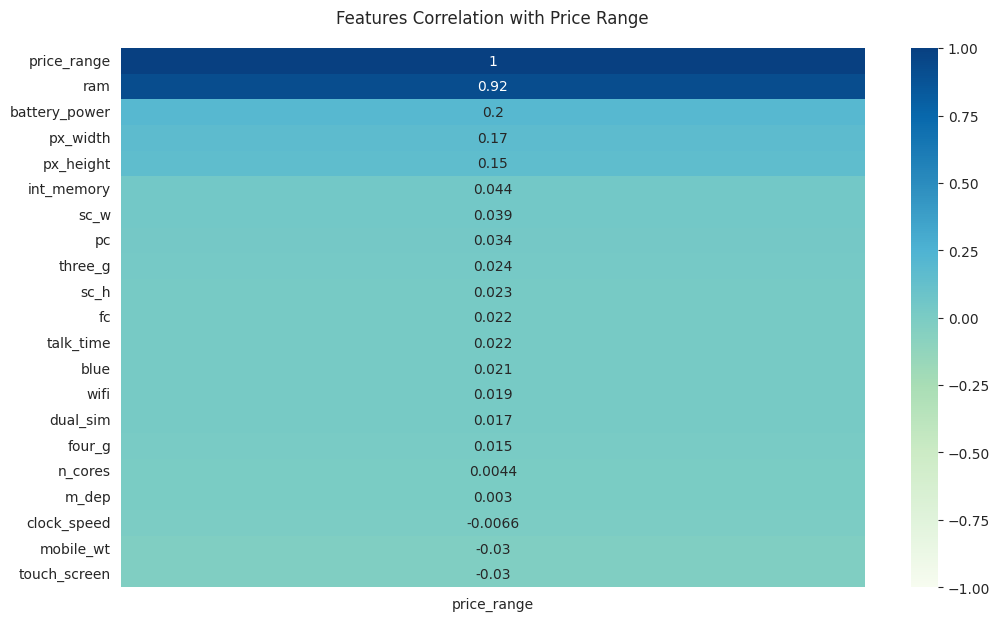

In [46]:
# Plotting correlation of all features with price range(target variable)\
plt.figure (figsize = (12, 7), dpi = 100)
heatmap = sns.heatmap (mob_features_df.corr()[['price_range']].sort_values (by = 'price_range', ascending = False), vmin = -1, vmax = 1, annot = True, cmap = 'GnBu')
heatmap.set_title ('Features Correlation with Price Range', fontdict = {'fontsize':12}, pad = 18);

- So, we can see that there is a positive correlation between Price Range and ram, Price Range and battery_power, and Price Range and px_width.

- We can see that most of the variables except clock_speed, mobile_wt and touch_screen are positively correlated with the target.

**Correlation between the features**

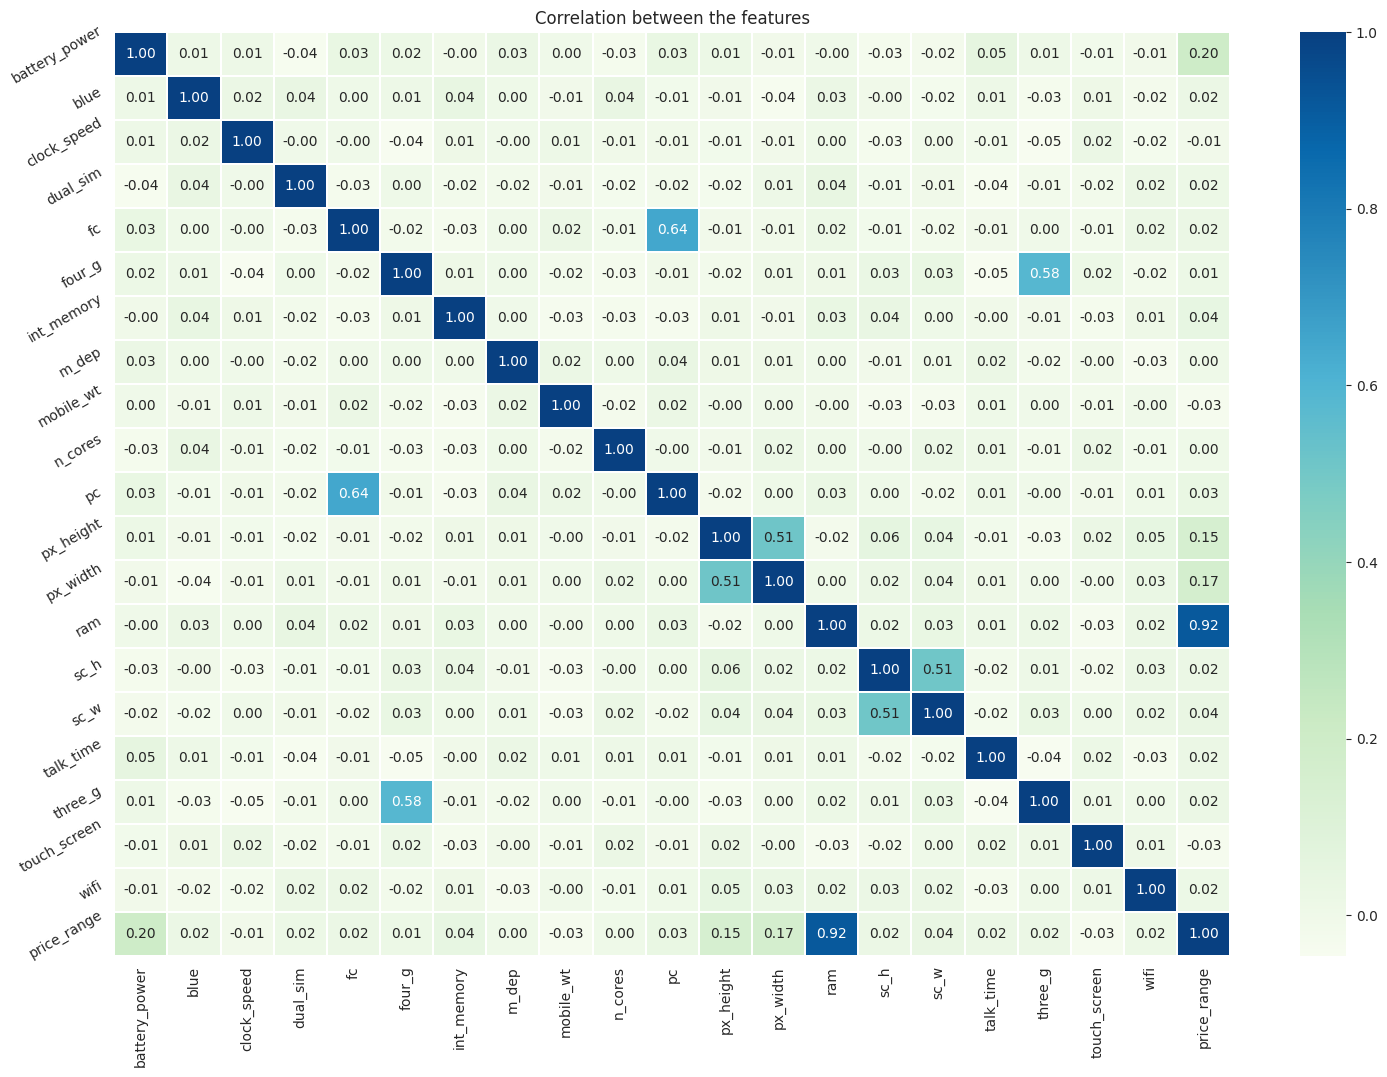

In [47]:
#plotting correlation between all the features.
fig=plt.gcf()
fig.set_size_inches(18, 12)
plt.title('Correlation between the features')
a = sns.heatmap(mob_features_df.corr(), annot = True, cmap = 'GnBu', fmt='.2f', linewidths=0.2)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

- as i found in previous graph there is a strong correlation between ram and price_range,it shows that RAM will plays a major deciding factor in estimating the price range.
- In addition, the heatmap above indicates a moderate correlation between 4G and 3G, fc and pc, px_height and px_width, and sc_h and sc_w.
- I also see that the combination of px_height and px_width are overall resolution of screen, so i decided to make one feature of them as screen_resolution.
- combination of sc_h and sc_w are overall screen size of the mobile, so i decided to make one feature of them as screen_size.  

In [48]:
# making a copy of our dataset.
final_mob_features = mob_features_df.copy()

In [49]:
# defining new variable from  pixels width & pixels height
final_mob_features['screen_resolution'] = final_mob_features['px_height']*df['px_width']

# Dropping px_height and px_width
final_mob_features.drop(['px_height', 'px_width'], axis = 1, inplace = True)

# defining new variable from  screen width & screen height
final_mob_features['screen_size'] = final_mob_features['sc_h']*mob_features_df['sc_w']

# Dropping sc_h and sc_w
final_mob_features.drop(['sc_h', 'sc_w'], axis = 1, inplace = True)

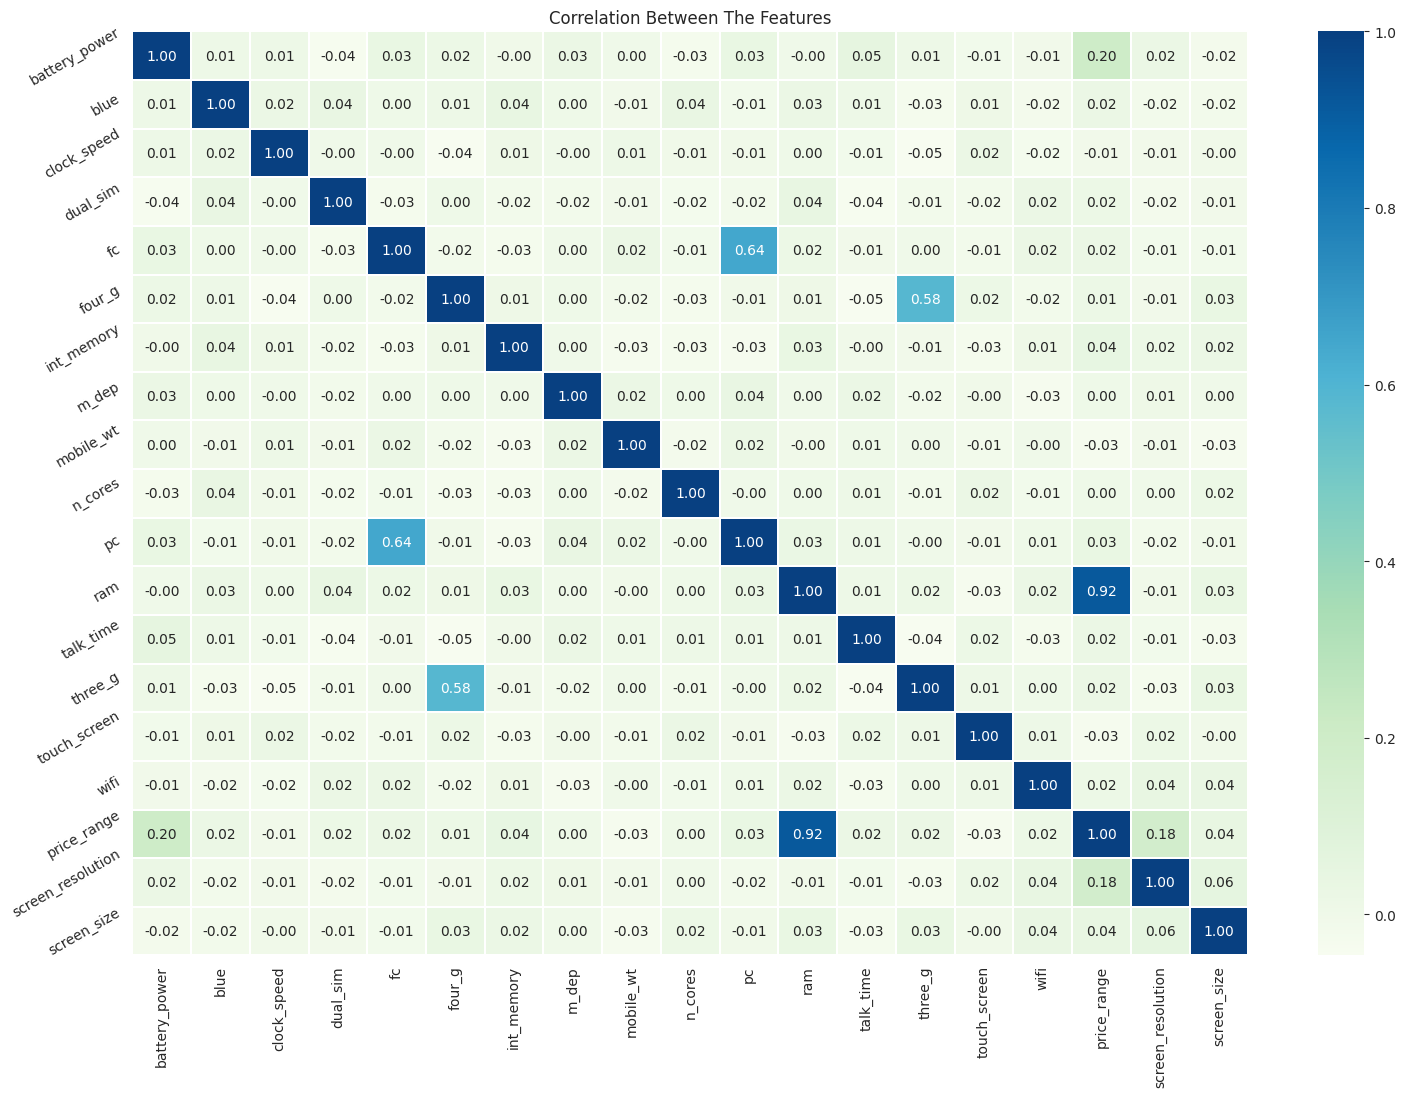

In [50]:
# checking correlation again
fig=plt.gcf()
fig.set_size_inches(18, 12)
plt.title('Correlation Between The Features')
a = sns.heatmap(final_mob_features.corr(), annot = True, cmap = 'GnBu', fmt='.2f', linewidths=0.2)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [51]:
num_cols = pd.DataFrame (mob_features_df, columns= ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'])

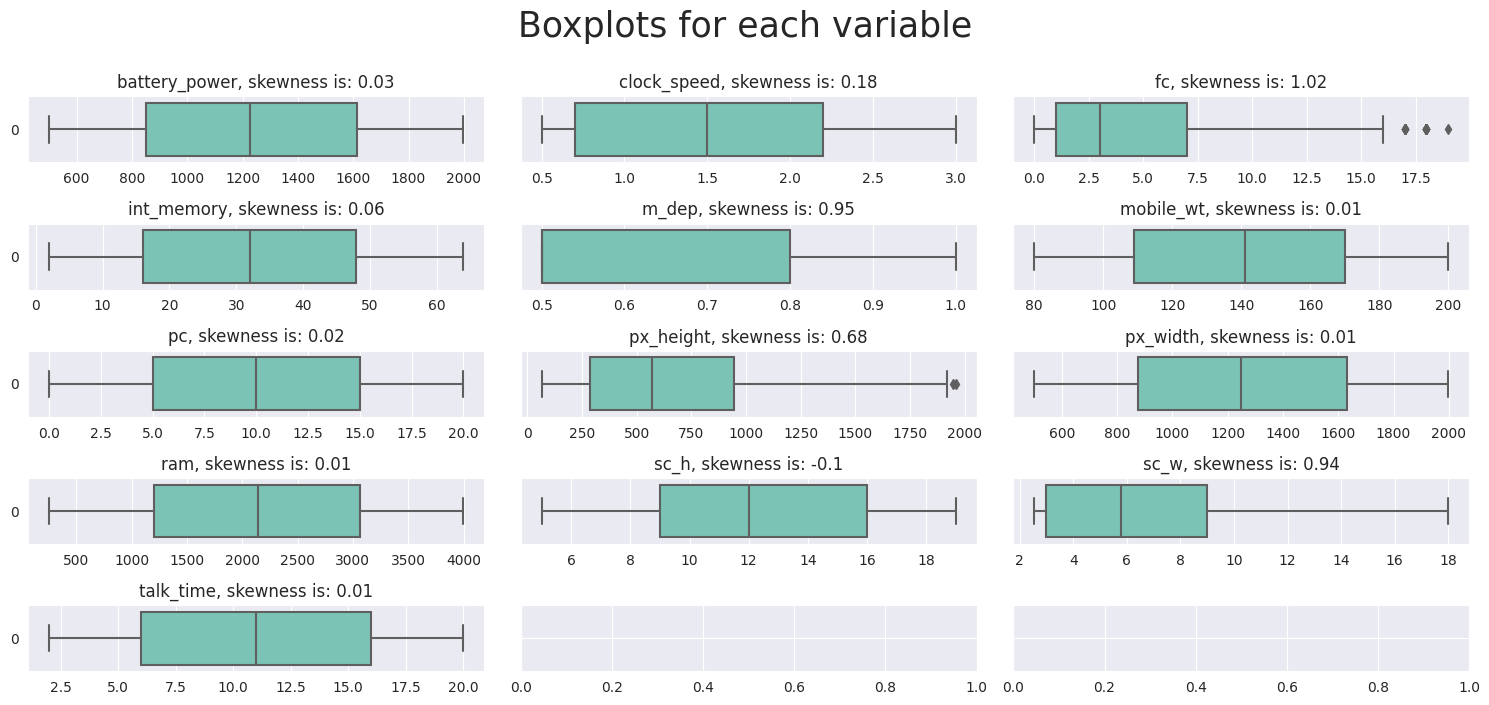

In [52]:
#defining a function to visualize the Numerical Features by boxplots
sns.set_style('darkgrid')
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(15,7))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', color ='#6fcfbc', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True), 2)))

boxplots_custom(dataset=mob_features_df, columns_list=num_cols, rows=5, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

# **Model 1 (with columns  screen_resolution & screen_size instead of sc_h, sc_w, px_width, px_height**)

In [53]:
# Defining X and y
X = final_mob_features.drop(['price_range'], axis = 1)
y = final_mob_features['price_range']

In [54]:
# Checking the shape of X and y
print ('X:', X.shape,'\ny:', y.shape)

X: (2000, 18) 
y: (2000,)


In [55]:
# Scaling values of X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [56]:
# Splitting dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 2)

In [57]:
# check the shape of X_train, X_test, y_train and y_test
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (1600, 18)
X_test shape:  (400, 18)
y_train shape:  (1600,)
y_test shape:  (400,)


**Logistic Regression**

In [58]:
# Applying logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [59]:
# Predicting
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

In [60]:
# classification report for test
from sklearn.metrics import classification_report
print('Classification report for Logistic Regression on Test set= ')
print(classification_report(y_pred_test, y_test))

Classification report for Logistic Regression on Test set= 
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       107
           1       0.84      0.95      0.89        97
           2       0.88      0.87      0.88        95
           3       0.95      0.93      0.94       101

    accuracy                           0.92       400
   macro avg       0.92      0.91      0.91       400
weighted avg       0.92      0.92      0.92       400



[[97  1  0  0]
 [10 92  7  0]
 [ 0  4 83  7]
 [ 0  0  5 94]]


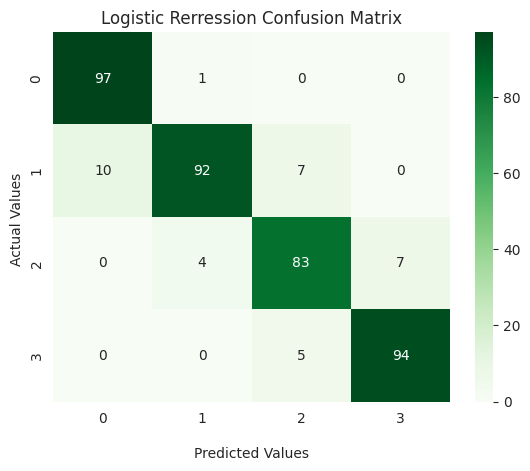

In [61]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix_lr = confusion_matrix(y_test, y_pred_test)
print(cf_matrix_lr)
ax = sns.heatmap(cf_matrix_lr, annot=True, cmap='Greens')
ax.set_title('Logistic Rerression Confusion Matrix')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

plt.grid(False)

In [62]:
# Evaluation metrics for train
from sklearn.metrics import classification_report
print('Classification report for Logistic Regression on Train set = ')
print( classification_report(y_pred_train, y_train))

Classification report for Logistic Regression on Train set = 
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       414
           1       0.88      0.91      0.90       380
           2       0.86      0.90      0.88       388
           3       0.97      0.93      0.95       418

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.92      1600
weighted avg       0.93      0.92      0.92      1600



**Random Forest for classification**

In [63]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [64]:
# taking 300 trees
clsr = RandomForestClassifier(n_estimators=300)
clsr.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [65]:
# predicting x_test
y_pred_rf = clsr.predict(X_test)
test_score= accuracy_score(y_test, y_pred_rf)
test_score


0.9025

In [66]:
# predicting x_train
y_pred_train_rf = clsr.predict(X_train)
test_score= accuracy_score(y_train, y_pred_train_rf)
test_score

1.0

In [67]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        98
           1       0.91      0.83      0.87       109
           2       0.86      0.88      0.87        94
           3       0.94      0.95      0.94        99

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



[[94  4  0  0]
 [11 90  8  0]
 [ 0  5 83  6]
 [ 0  0  5 94]]


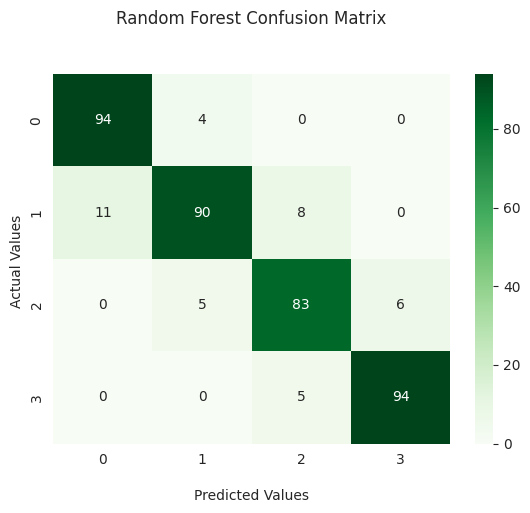

In [68]:
#import seaborn as sns
#from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(cf_matrix_rf)

ax = sns.heatmap(cf_matrix_rf, annot=True, cmap='Greens')

ax.set_title('Random Forest Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [69]:
# feature importance
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

Feature     Score
0                ram  0.500180
1      battery_power  0.083612
2  screen_resolution  0.077679
3          mobile_wt  0.043121
4        screen_size  0.042053

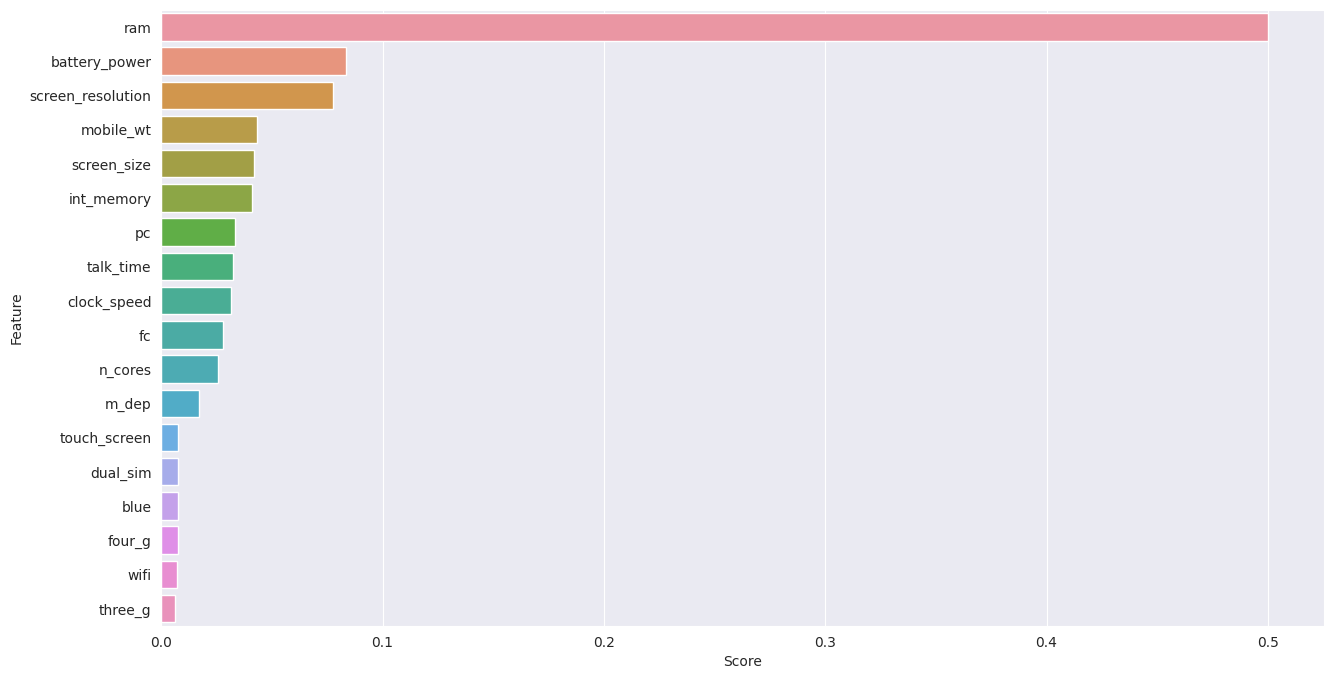

In [70]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

**Hyperparameter tuning & Cross validation**

In [71]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,50,100,200],
          'max_depth':[10,20,30,40],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10, 20, 40]
          }
rf = RandomForestClassifier()
clsr = GridSearchCV(rf, params, scoring='accuracy', cv=3)
clsr.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [72]:
clsr.best_params_

{'max_depth': 20,
 'max_features': 'log2',
 'max_leaf_nodes': 40,
 'min_samples_split': 6,
 'n_estimators': 200}

In [73]:
clsr.best_estimator_

RandomForestClassifier(max_depth=20, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=6, n_estimators=200)

In [74]:
clsr.best_score_

0.8579959269614442

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clsr.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [76]:
# predicting
y_pred_grf = clsr.predict(X_test)
accuracy_score(y_test, y_pred_grf)

0.87

In [77]:
# classification report for tuned random forest
print('Classification report for Random Forest with Hyperparameter Tuning on Test set = ')
print( classification_report(y_test, y_pred_grf))

Classification report for Random Forest with Hyperparameter Tuning on Test set = 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.86      0.79      0.82        91
           2       0.75      0.84      0.79        92
           3       0.93      0.88      0.90       112

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



[[101   4   0   0]
 [  7  72  12   0]
 [  0   8  77   7]
 [  0   0  14  98]]


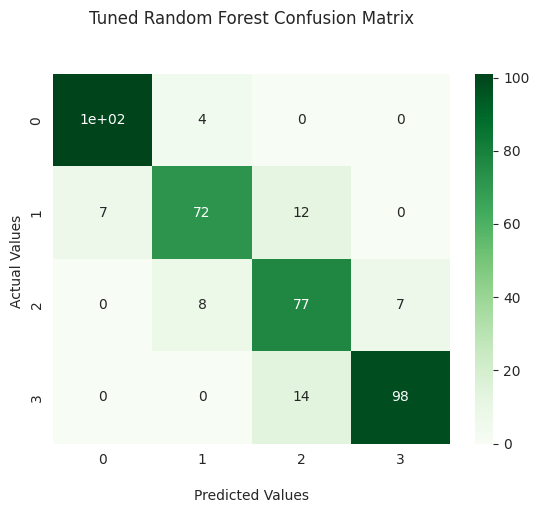

In [78]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix_grf = confusion_matrix(y_test, y_pred_grf)

print(cf_matrix_grf)

ax = sns.heatmap(cf_matrix_grf, annot=True, cmap='Greens')

ax.set_title('Tuned Random Forest Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()


In [79]:
y_pred_train_grf = clsr.predict(X_train)
accuracy_score(y_train, y_pred_train_grf)

0.941875

In [80]:
# feature importance
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

Feature     Score
0                ram  0.690807
1      battery_power  0.072975
2  screen_resolution  0.063304
3         int_memory  0.026962
4          mobile_wt  0.025481

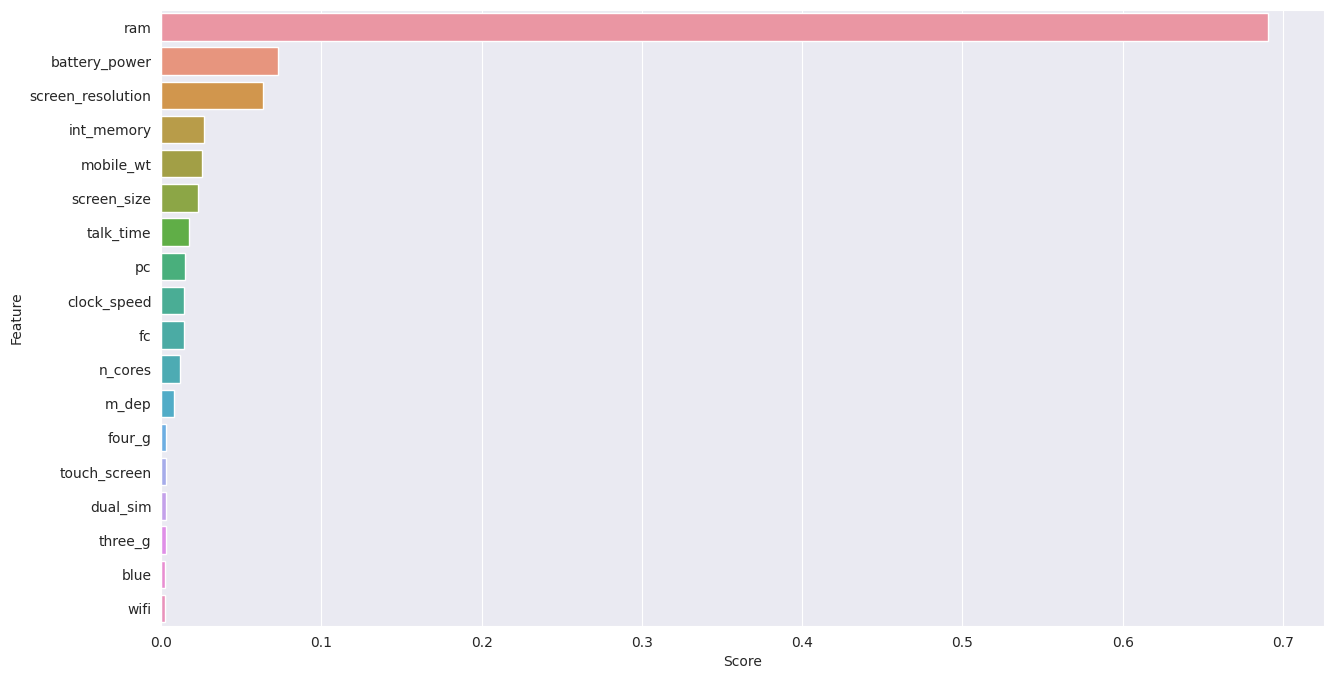

In [81]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

**Decision Tree for classification**

In [82]:
# Applying Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [83]:
# Predicting
y_pred_test_dt = dt.predict(X_test)
y_pred_train_dt = dt.predict(X_train)


In [84]:
# accuracy score on test set
accuracy_score(y_test, y_pred_test_dt)

0.82

In [85]:
# Evaluation metrics for test
print('Classification report for Decision Tree on Test set = ')
print(classification_report(y_pred_test_dt, y_test))

Classification report for Decision Tree on Test set = 
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        93
           1       0.81      0.73      0.77       101
           2       0.78      0.67      0.72       108
           3       0.81      0.93      0.87        98

    accuracy                           0.82       400
   macro avg       0.82      0.83      0.82       400
weighted avg       0.82      0.82      0.82       400



[[91 14  0  0]
 [ 2 74 15  0]
 [ 0 13 72  7]
 [ 0  0 21 91]]


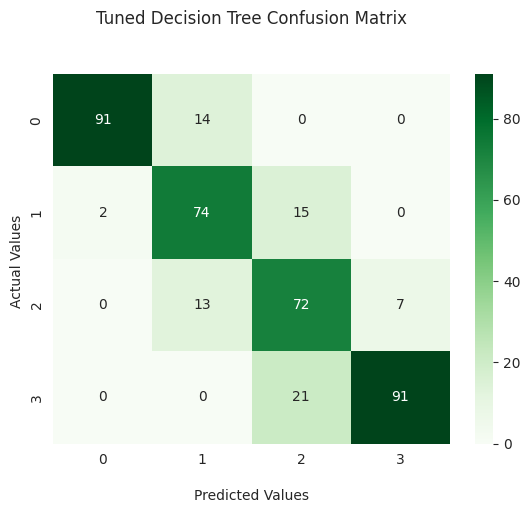

In [86]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix_dt = confusion_matrix(y_test, y_pred_test_dt)

print(cf_matrix_dt)

ax = sns.heatmap(cf_matrix_dt, annot=True, cmap='Greens')

ax.set_title('Tuned Decision Tree Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()


In [87]:
# accuracy score on train set
accuracy_score(y_train, y_pred_train_dt)

0.8675

In [88]:
# Evaluation metrics for test
print('Classification report for Decision Tree on Train set = ')
print(classification_report(y_train, y_pred_train_dt))

Classification report for Decision Tree on Train set = 
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       395
           1       0.81      0.88      0.84       409
           2       0.77      0.84      0.80       408
           3       0.96      0.84      0.90       388

    accuracy                           0.87      1600
   macro avg       0.88      0.87      0.87      1600
weighted avg       0.88      0.87      0.87      1600



Hyperparameter tuning & cross validation

In [89]:
#from sklearn.model_selection import GridSearchCV

# Cross validation
grid_dt = GridSearchCV(dt, param_grid = {'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)}, scoring = 'accuracy', cv = 5, verbose = 24)
grid_dt.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 1/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.816 total time=   0.0s
[CV 2/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 2/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.812 total time=   0.0s
[CV 3/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 3/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.809 total time=   0.0s
[CV 4/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 4/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.769 total time=   0.0s
[CV 5/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 5/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.809 total time=   0.0s
[CV 1/5; 2/4] START max_depth=5, max_leaf_nodes=100.............................
[CV 1/5; 2/4] END max_depth=5, max_leaf_node

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)},
             scoring='accuracy', verbose=24)

In [90]:
# Predicting

y_pred_test_gdt = grid_dt.predict(X_test)
y_pred_train_gdt = grid_dt.predict(X_train)
# Evaluation metrics for test
print('Classification Report for Decision Tree on Test set  = ')
print(classification_report(y_test, y_pred_test_gdt))

Classification Report for Decision Tree on Test set  = 
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       105
           1       0.75      0.82      0.79        91
           2       0.78      0.75      0.76        92
           3       0.91      0.92      0.92       112

    accuracy                           0.85       400
   macro avg       0.85      0.84      0.84       400
weighted avg       0.85      0.85      0.85       400



[[ 93  12   0   0]
 [  5  75  11   0]
 [  0  13  69  10]
 [  0   0   9 103]]


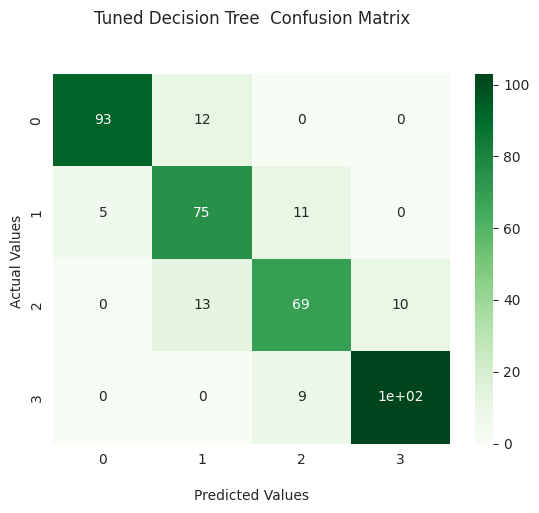

In [91]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix_dt = confusion_matrix(y_test, y_pred_test_gdt)

print(cf_matrix_dt)

ax = sns.heatmap(cf_matrix_dt, annot=True, cmap='Greens')

ax.set_title('Tuned Decision Tree  Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [92]:
# Evaluation metrics for train
print('Classification Report for Decision Tree on Train set = ')
print(classification_report(y_train, y_pred_train_gdt))

Classification Report for Decision Tree on Train set = 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       395
           1       0.95      0.97      0.96       409
           2       0.98      0.97      0.97       408
           3       1.00      0.99      0.99       388

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600



**xgboost for classificaion**

In [93]:
from xgboost import XGBClassifier

# Applying XGBoost
xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgb.fit(X_train, y_train)
XGBClassifier(max_depth=5, objective='multi:softprob')
# Predicting
y_pred_train_xg = xgb.predict(X_train)
y_pred_test_xg = xgb.predict(X_test)
# Evaluation metrics for test

score = classification_report(y_test, y_pred_test_xg)
print('Classification Report for XGBoost on Test set = ')
print(score)

Classification Report for XGBoost on Test set = 
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       105
           1       0.82      0.88      0.85        91
           2       0.83      0.82      0.82        92
           3       0.94      0.91      0.93       112

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.89      0.89       400



In [94]:
# Evaluation metrics for train
score = classification_report(y_train, y_pred_train_xg)
print('Classification Report for XGBoost on Train set = ')
print(score)

Classification Report for XGBoost on Train set = 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



Hyperparameter Tuning & Cross validation

In [95]:
## Hyperparameter Tuning & Cross validation
grid_xgb = GridSearchCV(xgb, param_grid={'n_estimators': (10, 200), 'learning_rate': [1, 0.5, 0.1, 0.01, 0.001], 'max_depth': (5, 10),
                                     'gamma': [1.5, 1.8], 'subsample': [0.3, 0.5, 0.8]}, cv = 5, scoring = 'accuracy', verbose = 10)
grid_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 1/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.847 total time=   0.1s
[CV 2/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 2/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.866 total time=   0.1s
[CV 3/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 3/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.856 total time=   0.1s
[CV 4/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 4/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.847 total time=   0.1s
[CV 5/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softprob', predictor=None, ...),
             param_grid={'gamma': [1.5, 1.8],
                         'learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': (5, 10), 'n_estimators': (10, 200),
                         'subsample': [0.3, 0.5, 0.8]},
             scoring='accuracy', verbose=10)

In [96]:
# Predicting
y_pred_train_gxgb = grid_xgb.predict(X_train)
y_pred_test_gxgb = grid_xgb.predict(X_test)

# Evaluation metrics for test
score = classification_report(y_test, y_pred_test_gxgb)
print('Classification Report for tuned XGBoost on Test set = ')
print(score)

Classification Report for tuned XGBoost on Test set = 
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       105
           1       0.86      0.88      0.87        91
           2       0.82      0.87      0.85        92
           3       0.94      0.89      0.92       112

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400



[[ 98   7   0   0]
 [  6  80   5   0]
 [  0   6  80   6]
 [  0   0  12 100]]


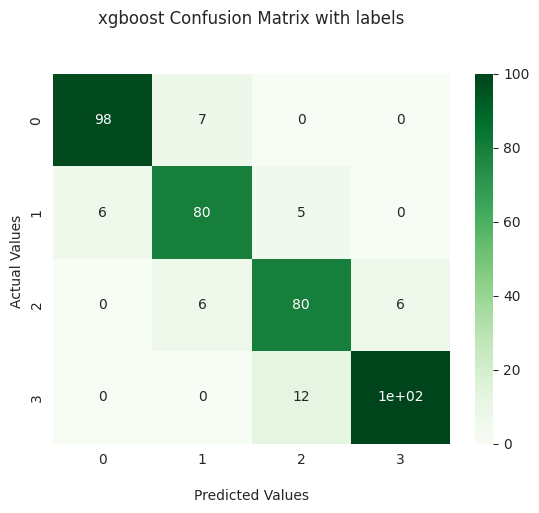

In [97]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix_gxgb = confusion_matrix(y_test, y_pred_test_gxgb)

print(cf_matrix_gxgb)

ax = sns.heatmap(cf_matrix_gxgb, annot=True, cmap='Greens')

ax.set_title('xgboost Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [98]:
# Evaluation metrics for train
score = classification_report(y_train, y_pred_train_gxgb)
print('Classification Report for tuned XGBoost on Train set = ')
print(score)


Classification Report for tuned XGBoost on Train set = 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       395
           1       0.99      1.00      0.99       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



**SVM for classification**

In [99]:
# defining x and y
y_ = final_mob_features["price_range"].values
x_data=final_mob_features.drop(["price_range"],axis=1)
#x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
#x = scaler1.fit_transform(x_data)


In [100]:
# splitting data into train test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train_, y_test_ = train_test_split(x_data,y_,test_size = 0.2,random_state=2)

In [101]:
# Scale the features using StandardScaler
scaler1 = StandardScaler()

# Fit the scaler to the training data and transform it
x_train = scaler1.fit_transform(x_train)

# Transform the test data using the same scaler
x_test = scaler1.transform(x_test)

In [102]:
x_train.shape , x_test.shape

((1600, 18), (400, 18))

In [103]:
# Applying SVM
from sklearn.svm import SVC
svm_model_ = SVC(probability=True)
svm_model_.fit(x_train,y_train_)

# predicting
y_pred_train_svm = svm_model_.predict(x_train)
y_pred_test_svm = svm_model_.predict(x_test)

# evaluation metric
print(classification_report(y_train_,y_pred_train_svm))#"train accuracy:",svm.score(y_train,pr ))
print(classification_report(y_test_,y_pred_test_svm))#"test accuracy:",svm.score(y_test,pr2))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       402
           1       0.96      0.97      0.96       391
           2       0.96      0.96      0.96       406
           3       0.98      0.98      0.98       401

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600

              precision    recall  f1-score   support

           0       0.94      0.95      0.94        98
           1       0.85      0.86      0.85       109
           2       0.81      0.83      0.82        94
           3       0.96      0.91      0.93        99

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



[[93  5  0  0]
 [ 6 94  9  0]
 [ 0 12 78  4]
 [ 0  0  9 90]]


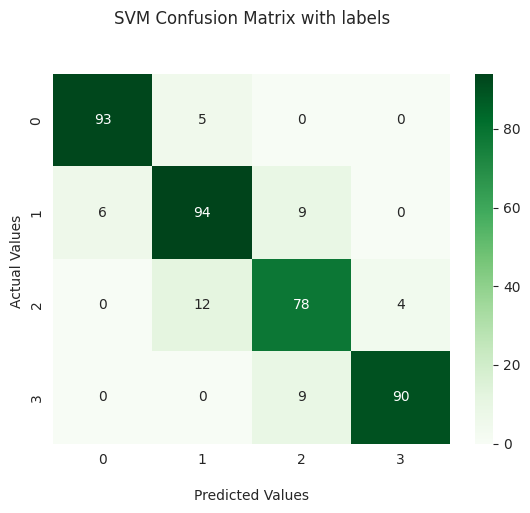

In [104]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix_svm = confusion_matrix(y_test_,y_pred_test_svm)

print(cf_matrix_svm)

ax = sns.heatmap(cf_matrix_svm, annot=True, cmap='Greens')

ax.set_title('SVM Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

Hyperparameter Tuning & Cross Validation

In [105]:
# Finding optimal hyperparameters(GridSearchCV)
from sklearn.model_selection import GridSearchCV

# Define model
model_svm = SVC(probability=True)

# Define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state = 2)

# Define search parameters
C = [0.1, 1, 10, 100]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = ['scale', 'auto']

#degree = [2, 3, 4]
#coef0 = [0, 1, 2]

param_grid = {'C': C, 'kernel': kernel, 'gamma': gamma}

# Define search
search_ = GridSearchCV(model_svm, param_grid, scoring='accuracy', n_jobs=-1, cv=cv)

# Execute search
GridSearchCV_ = search_.fit(x_train,y_train_)

# Set the clf to the best combination of parameters
svm_model_cv_ = GridSearchCV_.best_estimator_

# Summarize result
print('Best Score: %s' % GridSearchCV_.best_score_)
print('Best Hyperparameters: %s' % GridSearchCV_.best_params_)

Best Score: 0.93125
Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [106]:
# fitting the model
svm_model_cv_.fit(x_train, y_train_)

SVC(C=10, kernel='linear', probability=True)

In [107]:
# predicting
y_trainpred_svm = svm_model_cv_.predict(x_train)
y_testpred_svm = svm_model_cv_.predict(x_test)


In [108]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test_, y_testpred_svm)))

Model accuracy score: 0.9325


In [109]:
# evaluation metric
print(classification_report(y_train_,y_trainpred_svm))#"train accuracy:",svm.score(y_train,pr ))
print(classification_report(y_test_,y_testpred_svm))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       402
           1       0.93      0.94      0.93       391
           2       0.93      0.92      0.92       406
           3       0.96      0.96      0.96       401

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600

              precision    recall  f1-score   support

           0       0.91      0.98      0.95        98
           1       0.96      0.87      0.91       109
           2       0.91      0.93      0.92        94
           3       0.95      0.96      0.95        99

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



[[96  2  0  0]
 [ 9 95  5  0]
 [ 0  2 87  5]
 [ 0  0  4 95]]


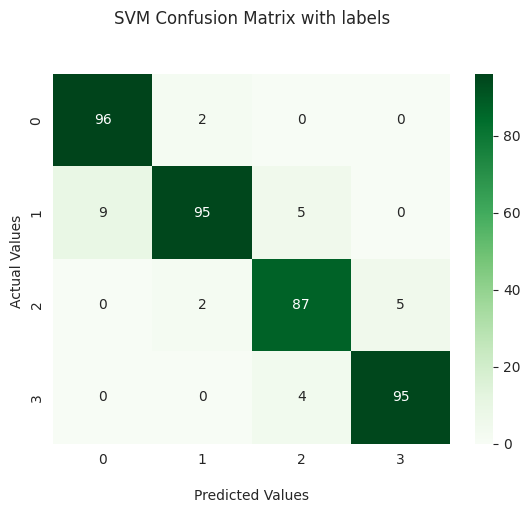

In [110]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix_svmCV = confusion_matrix(y_test_,y_testpred_svm)

print(cf_matrix_svmCV)

ax = sns.heatmap(cf_matrix_svmCV, annot=True, cmap='Greens')

ax.set_title('SVM Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

# **Model 2 (including columns sc_h, sc_w, px_width, px_height)**

In [111]:
from sklearn.feature_selection import SelectFromModel

In [112]:
# defining x and y
y1 = mob_features_df["price_range"].values
x1 =mob_features_df.drop(["price_range"],axis=1)

# normalization with minmaxscaler
x2 = (x1-np.min(x1))/(np.max(x1)-np.min(x1))
#x = scaler1.fit_transform(x_data)


In [113]:
# splitting the data
from sklearn.model_selection import train_test_split
x_train3, x_test3, y_train3, y_test3 = train_test_split(x2,y1,test_size = 0.2,random_state=2)

**Logistic Regression**

In [114]:
# Applying logistic regression
from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression()
lr2.fit(x_train3, y_train3)

LogisticRegression()

In [115]:
# predicting
lr_train_pred2 = lr2.predict(x_train3)
lr_test_pred2 = lr2.predict(x_test3)

In [116]:
# classification report
print(classification_report(y_train3,lr_train_pred2))
print(classification_report(y_test3,lr_test_pred2))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       402
           1       0.92      0.89      0.91       391
           2       0.93      0.89      0.91       406
           3       0.95      0.99      0.97       401

    accuracy                           0.94      1600
   macro avg       0.94      0.94      0.94      1600
weighted avg       0.94      0.94      0.94      1600

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        98
           1       0.95      0.83      0.88       109
           2       0.89      0.90      0.90        94
           3       0.95      0.98      0.97        99

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



[[97  1  0  0]
 [11 90  8  0]
 [ 0  4 85  5]
 [ 0  0  2 97]]


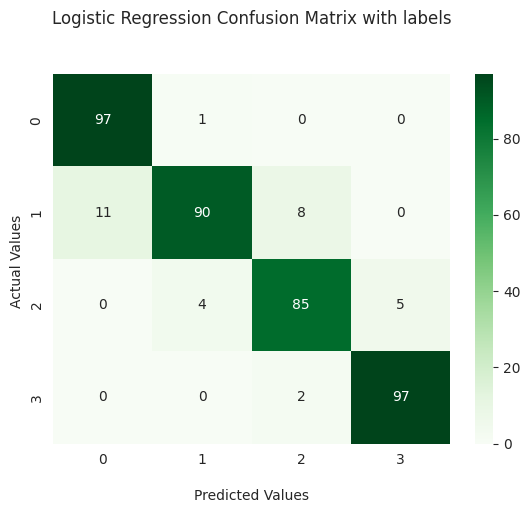

In [117]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix_lr2 = confusion_matrix(y_test3,lr_test_pred2)

print(cf_matrix_lr2)

ax = sns.heatmap(cf_matrix_lr2, annot=True, cmap='Greens')

ax.set_title('Logistic Regression Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

**SVM for Classification**

In [118]:
from sklearn.svm import SVC
svm_model_3 = SVC(random_state=2) # defining
svm_model_3.fit(x_train3,y_train3)

y_pred_train_svm3 = svm_model_3.predict(x_train3) # predicting
y_pred_test_svm3 = svm_model_3.predict(x_test3) # predicting

# classification report
print(classification_report(y_train3,y_pred_train_svm3))
print(classification_report(y_test3,y_pred_test_svm3))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       402
           1       0.95      0.96      0.96       391
           2       0.94      0.95      0.95       406
           3       0.98      0.97      0.97       401

    accuracy                           0.96      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.96      0.96      1600

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        98
           1       0.85      0.85      0.85       109
           2       0.80      0.83      0.81        94
           3       0.94      0.90      0.92        99

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



[[91  7  0  0]
 [ 6 93 10  0]
 [ 0 10 78  6]
 [ 0  0 10 89]]


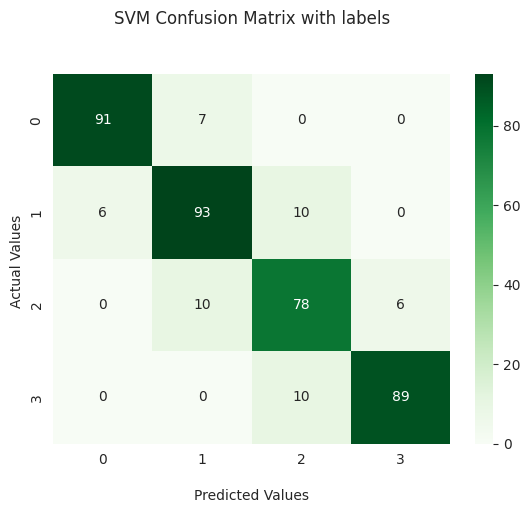

In [119]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix_svm3 = confusion_matrix(y_test3,y_pred_test_svm3)

print(cf_matrix_svm3)

ax = sns.heatmap(cf_matrix_svm3, annot=True, cmap='Greens')

ax.set_title('SVM Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

Hyperparameter tuning & cross validation

In [120]:
# Finding optimal hyperparameters(GridSearchCV)
from sklearn.model_selection import GridSearchCV

# Define model
model_svm_3 = SVC(random_state=2)

# Define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state = 2)

# Define search parameters
C = [0.1, 1, 10, 100]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = ['scale', 'auto']

#degree = [2, 3, 4]
#coef0 = [0, 1, 2]

param_grid = {'C': C, 'kernel': kernel, 'gamma': gamma}

# Define search
search_3 = GridSearchCV(model_svm_3, param_grid, scoring='accuracy', n_jobs=-1, cv=cv)

# Execute search
GridSearchCV_3 = search_3.fit(x_train3,y_train3)

# Set the clf to the best combination of parameters
svm_model_cv_3 = GridSearchCV_3.best_estimator_

# Summarize result
print('Best Score: %s' % GridSearchCV_3.best_score_)
print('Best Hyperparameters: %s' % GridSearchCV_3.best_params_)

Best Score: 0.9702083333333335
Best Hyperparameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}


In [121]:
# model fitting with best estimators
svm_model_cv_3.fit(x_train3, y_train3)

SVC(C=100, kernel='linear', random_state=2)

In [122]:
# predicting
y_trainpred_svm3 = svm_model_cv_3.predict(x_train3)
y_testpred_svm3 = svm_model_cv_3.predict(x_test3)

In [123]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test3, y_testpred_svm3)))

Model accuracy score: 0.9675


In [124]:
# classification report
from sklearn.svm import SVC
svm_model_cv_3 = SVC(random_state=2)
svm_model_cv_3.fit(x_train3,y_train3)

#y_pred_train_svm3 = svm_model_3.predict(x_train3)
#y_pred_test_svm3 = svm_model_3.predict(x_test3)
print(classification_report(y_train3,y_trainpred_svm3))#"train accuracy:",svm.score(y_train,pr ))
print(classification_report(y_test3,y_testpred_svm3))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       402
           1       0.98      0.97      0.98       391
           2       0.97      0.99      0.98       406
           3       0.99      0.99      0.99       401

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        98
           1       0.98      0.93      0.95       109
           2       0.96      0.98      0.97        94
           3       0.98      0.99      0.98        99

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



[[ 96   2   0   0]
 [  5 101   3   0]
 [  0   0  92   2]
 [  0   0   1  98]]


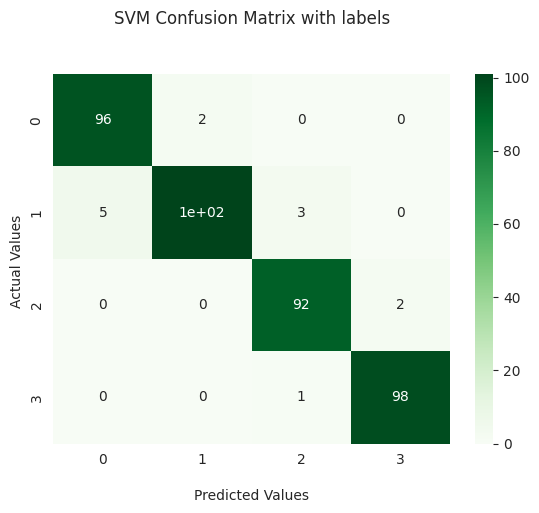

In [125]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix_svmCV3 = confusion_matrix(y_test3,y_testpred_svm3)

print(cf_matrix_svmCV3)

ax = sns.heatmap(cf_matrix_svmCV3, annot=True, cmap='Greens')

ax.set_title('SVM Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

## ***Future Work***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [126]:
# Save the File
import joblib

joblib.dump(svm_model_cv_3, 'classification_model.joblib')

['classification_model.joblib']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [127]:
# Load the File and predict unseen data.
regg = joblib.load('classification_model.joblib')
predictions = regg.predict(x_test3)
predictions

array([0, 2, 1, 2, 2, 1, 3, 3, 2, 1, 1, 0, 2, 3, 1, 3, 2, 1, 1, 3, 0, 2,
       0, 1, 3, 2, 2, 0, 0, 2, 0, 2, 0, 1, 1, 0, 3, 0, 2, 2, 0, 1, 3, 3,
       2, 0, 2, 2, 1, 3, 1, 3, 3, 2, 3, 0, 1, 0, 1, 1, 1, 2, 1, 2, 0, 2,
       0, 1, 0, 3, 1, 1, 0, 2, 0, 2, 2, 3, 2, 3, 3, 2, 1, 1, 0, 3, 3, 2,
       0, 1, 1, 2, 0, 0, 1, 2, 0, 2, 2, 0, 1, 3, 1, 1, 2, 3, 3, 2, 2, 1,
       3, 1, 1, 1, 3, 0, 1, 1, 1, 2, 0, 3, 3, 0, 3, 0, 3, 1, 0, 0, 1, 3,
       2, 1, 0, 3, 3, 0, 2, 0, 1, 3, 3, 0, 2, 3, 1, 3, 0, 1, 2, 2, 1, 2,
       0, 3, 0, 3, 1, 1, 1, 1, 3, 0, 1, 3, 2, 3, 1, 0, 2, 1, 0, 3, 0, 1,
       1, 1, 3, 3, 2, 2, 1, 2, 2, 0, 0, 1, 3, 1, 1, 0, 1, 1, 3, 2, 0, 1,
       3, 1, 0, 2, 3, 0, 3, 3, 2, 2, 2, 3, 3, 2, 1, 0, 2, 1, 0, 1, 3, 0,
       0, 3, 0, 1, 1, 0, 1, 3, 1, 2, 3, 3, 3, 0, 3, 0, 1, 2, 1, 3, 2, 2,
       2, 0, 2, 3, 0, 3, 1, 1, 1, 0, 2, 3, 2, 1, 1, 3, 3, 0, 0, 0, 3, 3,
       0, 3, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 3, 3, 0, 2, 2, 1,
       0, 2, 2, 3, 0, 1, 2, 0, 3, 1, 2, 0, 2, 0, 3,

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion from Model Training**

I found that sc_h , sc_w , px_width , px_height columns having high correlation. So, i decided to create a new column from sc_w & sc_h as screen_size and from px_width & px_height as screen_resolution.I found some numeric features in the dataset, including m_dep, px height, and sc_w, whose minimum values did not make sense.So, i decided to cap it with relevant values and tried to train our model. I used various algorithms such as Logistic regression, Decision tree with hyperparameter tuning & cross validation, Random Forest with hyperparameter tuning & cross validation, xgboost with hyperparameter tuning,SVM with hyperparameter tuning & cross validation and got accuracy score around 93%.

I also want to see the model accuracy on total dataset(including columns sc_h , sc_w , px_width , px_height). So i trained another model using the same algorithms and i got accuracy near about 97% which is better than previous model.

So i came across with conclusion that changing sc_w & sc_h as screen_size and px_width & px_height as screen_resolution actually removes lot of information from dataset and therefore i decided not to change those columns.I got my best classification from SVM with hyperparameter tuning & cross validation.